<a href="https://colab.research.google.com/github/OmarRodriguezLopez1398/ML_Corrections_Reactions_Training/blob/main/notebook_coimbra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

! uv pip install mace-torch data-tutorials weas_widget tblite==0.4.0 rdkit  --system
get_ipython().kernel.do_shutdown(restart=True)

! pip install ase

Using Python 3.12.12 environment at: /usr
Resolved 140 packages in 2.33s
Prepared 19 packages in 2.80s
Installed 19 packages in 169ms
 + appdirs==1.4.4
 + ase==3.27.0
 + configargparse==1.7.1
 + data-tutorials==0.3.3
 + e3nn==0.4.4
 + jedi==0.19.2
 + lightning-utilities==0.15.2
 + lmdb==1.7.5
 + mace-torch==0.3.14
 + matscipy==1.2.0
 + opt-einsum-fx==0.1.4
 + python-hostlist==2.3.0
 + rdkit==2025.9.3
 + seekpath==2.1.0
 + spglib==2.7.0
 + tblite==0.4.0
 + torch-ema==0.3
 + torchmetrics==1.8.2
 + weas-widget==0.2.3


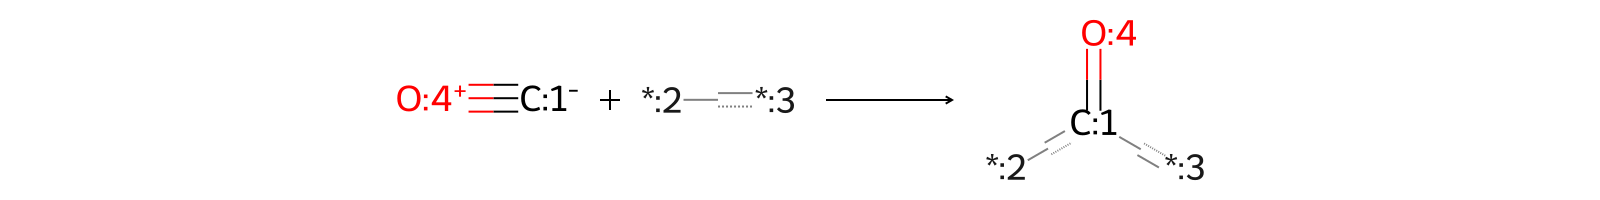

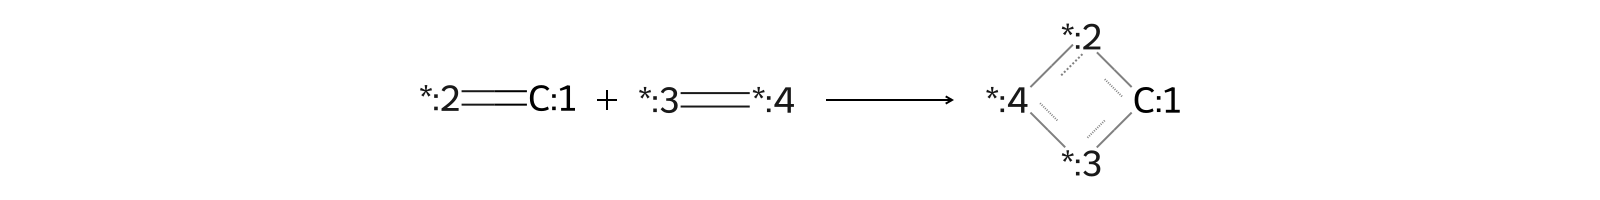

In [1]:
from rdkit import Chem
from rdkit.Chem import rdChemReactions, Draw
from IPython.display import display

# --------------------------------------------------
# Reacciones con centros reactivos explícitos
# --------------------------------------------------

rxn_dict = {
    # 1,2 CO insertion con carga formal en reactivos
    "1,2 CO Insertion": "[C-:1]#[O+:4].[*:2][*:3]>>[*:2][C:1](=[O:4])[*:3]",

    # 2+2 Cycloaddition genérica, usando R genéricos
    "2+2 Cycloaddition": "[C:1]=[*:2].[*:3]=[*:4]>>[C:1]1[*:3][*:4][*:2]1"
}

# Convertimos SMARTS a objetos de reacción RDKit
reactions = {name: rdChemReactions.ReactionFromSmarts(rxn) for name, rxn in rxn_dict.items()}

# --------------------------------------------------
# Dibujar las reacciones
# --------------------------------------------------
for name, rxn in reactions.items():
    img = Draw.ReactionToImage(rxn, subImgSize=(400, 200))
    display(img)


In [2]:
# 1️⃣ Clonar el repositorio si aún no se ha clonado
!git clone https://github.com/OmarRodriguezLopez1398/ML_Corrections_Reactions_Training.git

import os

# 2️⃣ Carpeta raíz de datos
base_path = "ML_Corrections_Reactions_Training/DATA"

# Listado de carpetas de reacciones
reaction_folders = ["1,2_Insertion_CO", "2+2_cycloaddition"]

# Diccionario para guardar archivos por carpeta
all_reactions = {}

for folder in reaction_folders:
    xyz_folder = os.path.join(base_path, folder)

    # Listar archivos xyz
    files = sorted([f for f in os.listdir(xyz_folder) if f.endswith(".xyz")])
    print(f"\nCarpeta: {folder}")
    print(f"{len(files)} archivos XYZ encontrados")

    # Separar por tipo
    reactivos = sorted([f for f in files if f.startswith("r_")])
    transiciones = sorted([f for f in files if f.startswith("ts_")])
    productos = sorted([f for f in files if f.startswith("prod_")])

    print("Ejemplos de archivos por tipo:")
    print("Reactivos:", reactivos[:5])
    print("TS:", transiciones[:5])
    print("Productos:", productos[:5])

    # Guardar en diccionario
    all_reactions[folder] = {
        "path": xyz_folder,
        "reactivos": reactivos,
        "transiciones": transiciones,
        "productos": productos
    }



Cloning into 'ML_Corrections_Reactions_Training'...
remote: Enumerating objects: 385, done.
remote: Counting objects: 100% (385/385), done.
remote: Compressing objects: 100% (382/382), done.
remote: Total 385 (delta 8), reused 371 (delta 1), pack-reused 0 (from 0)
Receiving objects: 100% (385/385), 1.64 MiB | 2.96 MiB/s, done.
Resolving deltas: 100% (8/8), done.

Carpeta: 1,2_Insertion_CO
136 archivos XYZ encontrados
Ejemplos de archivos por tipo:
Reactivos: ['r_rxn000075_dft_1.xyz', 'r_rxn000623_dft_1.xyz', 'r_rxn001540_dft_1.xyz', 'r_rxn001668_dft_1.xyz', 'r_rxn001788_dft_1.xyz']
TS: ['ts_rxn000075_dft_1.xyz', 'ts_rxn000623_dft_1.xyz', 'ts_rxn001540_dft_1.xyz', 'ts_rxn001668_dft_1.xyz', 'ts_rxn001788_dft_1.xyz']
Productos: ['prod_rxn000075_dft_1.xyz', 'prod_rxn000075_dft_2.xyz', 'prod_rxn000623_dft_1.xyz', 'prod_rxn000623_dft_2.xyz', 'prod_rxn001540_dft_1.xyz']

Carpeta: 2+2_cycloaddition
236 archivos XYZ encontrados
Ejemplos de archivos por tipo:
Reactivos: ['r_rxn000334_dft_1.xyz',

In [3]:
from ase.io import read, write
import os
import random
from collections import defaultdict

# -----------------------------
# Configuración
# -----------------------------
base_path = "ML_Corrections_Reactions_Training/DATA"
reaction_folders = ["1,2_Insertion_CO", "2+2_cycloaddition"]
combined_xyz = "all_reaction_configs_random_both.xyz"
random_seed = 42

random.seed(random_seed)

# -----------------------------
# Agrupar estructuras por reacción
# -----------------------------
rxn_dict = defaultdict(list)

for folder in reaction_folders:
    xyz_folder = os.path.join(base_path, folder)

    for fname in os.listdir(xyz_folder):
        if not fname.endswith(".xyz"):
            continue

        at = read(os.path.join(xyz_folder, fname))

        # Tipo de estructura
        if fname.startswith("r_"):
            structure_type = "reactant"
        elif fname.startswith("ts_"):
            structure_type = "transition_state"
        elif fname.startswith("prod_"):
            structure_type = "product"
        else:
            structure_type = "unknown"

        # Extraer reaction ID (ej: rxn000075)
        try:
            reaction_id = fname.split("_")[1]
        except IndexError:
            reaction_id = "unknown"

        # Guardar metadatos
        at.info["structure_type"] = structure_type
        at.info["reaction_id"] = reaction_id
        at.info["reaction_type"] = folder  # <- tipo de reacción
        at.info["source_file"] = fname

        rxn_dict[reaction_id].append(at)

# -----------------------------
# Barajar reacciones (NO estructuras individuales)
# -----------------------------
reaction_ids = list(rxn_dict.keys())
random.shuffle(reaction_ids)

# -----------------------------
# Construir lista final
# -----------------------------
all_atoms = []

# Orden químico interno recomendado
order = ["reactant", "transition_state", "product"]

for rxn_id in reaction_ids:
    configs = rxn_dict[rxn_id]

    # Ordenar dentro de cada reacción
    configs_sorted = sorted(
        configs,
        key=lambda at: order.index(at.info["structure_type"])
        if at.info["structure_type"] in order else 99
    )

    all_atoms.extend(configs_sorted)

# -----------------------------
# Escribir XYZ combinado
# -----------------------------
write(combined_xyz, all_atoms)

print(f"Archivo combinado creado: {combined_xyz}")
print(f"Número total de configuraciones: {len(all_atoms)}")
print(f"Número total de reacciones: {len(reaction_ids)}")


Archivo combinado creado: all_reaction_configs_random_both.xyz
Número total de configuraciones: 372
Número total de reacciones: 93


In [4]:
from ase.io import read, write
import numpy as np

# Leer todas las configuraciones del archivo combinado
db = read("all_reaction_configs_random_both.xyz", ":")

print("Number of configs in database: ", len(db))
print("Number of atoms in each config: ", np.array([len(at) for at in db]))
print("Number of atoms in the smallest config: ",
      np.min([len(at) for at in db]))  # test if database contains isolated atoms

# Inspeccionar metadatos
print("\nInformation stored in config.info:\n", db[10].info)
print("\nInformation stored in config.arrays:\n", db[10].arrays)


Number of configs in database:  372
Number of atoms in each config:  [12 12  6  6 12 12 10  2 15 15  7  8 12 12  2 10 16 16 12  4 15 15  4 11
  6  6  4  2 11 11  2  9 12 12  9  3 17 17  2 15 12 12  3  9 11 11  7  4
 12 12  4  8 12 12  2 10 14 14 10  4 10 10  6  4 16 16 12  4 13 13  9  4
  9  9  3  6 13 13  7  6 12 12  7  5 17 17  4 13 10 10  4  6 15 15 11  4
 10 10  8  2 11 11  2  9 17 17 11  6 13 13  9  4  9  9  7  2 13 13  4  9
 17 17  7 10 17 17  4 13  9  9  4  5 17 17 13  4 16 16 12  4 17 17 10  7
 15 15 13  2 13 13  9  4 11 11  2  9 14 14  4 10 13 13  9  4 11 11  9  2
 12 12  4  8 14 14  4 10 16 16  7  9 12 12 10  2 14 14  4 10 12 12  4  8
 19 19  4 15 13 13 11  2 16 16 14  2 16 16 12  4 14 14 10  4 16 16  2 14
 12 12  4  8 10 10  2  8 13 13  2 11 13 13  2 11 11 11  9  2 13 13  3 10
 11 11  4  7 12 12 10  2 12 12  8  4  9  9  4  5 12 12  4  8 12 12 10  2
 18 18  2 16 14 14  7  7 14 14  4 10 15 15  5 10 12 12  4  8 11 11  4  7
 13 13  2 11 15 15 11  4 17 17 13  4 16 16  7  9 14 14 

visualizar


In [5]:
import ipywidgets as widgets
from weas_widget import WeasWidget
from IPython.display import display
from ase.io import read

# -----------------------------
# Leer base de datos
# -----------------------------
db = read("all_reaction_configs_random_both.xyz", ":")

# -----------------------------
# Seleccionar reacción
# -----------------------------
rxn_id = "rxn000075"

rxn_configs = [at for at in db if at.info["reaction_id"] == rxn_id]

# Orden químico: R -> TS -> P
order = ["reactant", "transition_state", "product"]
rxn_configs_sorted = sorted(
    rxn_configs,
    key=lambda at: order.index(at.info["structure_type"])
)

print(f"Visualizando reacción {rxn_id}")
for at in rxn_configs_sorted:
    print(at.info["structure_type"], at.info["source_file"])

# -----------------------------
# Crear visores WEAS
# -----------------------------
viewers = []

for atoms in rxn_configs_sorted:
    viewer = WeasWidget()
    viewer.from_ase(atoms)

    # Ajustes visuales
    viewer.avr.model_style = 0            # bolas y sticks
    viewer.avr.show_hydrogen_bonds = False

    # Etiqueta visual (muy útil didácticamente)
    viewer.title = f"{rxn_id} | {atoms.info['structure_type']}"

    viewers.append(viewer)

# -----------------------------
# Layout: lado a lado
# -----------------------------
display(widgets.HBox(viewers))


Visualizando reacción rxn000075
reactant r_rxn000075_dft_1.xyz
transition_state ts_rxn000075_dft_1.xyz
product prod_rxn000075_dft_1.xyz
product prod_rxn000075_dft_2.xyz


añadiendo isolated atoms

In [6]:
from ase.io import read, write
import os

# -----------------------------
# Rutas de archivos
# -----------------------------
isolated_atoms_path = "/content/ML_Corrections_Reactions_Training/DATA/isolated_atoms.xyz"
# ajusta el path según tu estructura de carpetas

reaction_xyz_path = "all_reaction_configs_random_both.xyz"
final_xyz_path = "dataset_with_isolated_atoms.xyz"

# -----------------------------
# Leer átomos aislados
# -----------------------------
isolated_atoms = read(isolated_atoms_path, ":")

print(f"Número de configuraciones de átomos aislados: {len(isolated_atoms)}")

# Aseguramos etiquetas consistentes
for at in isolated_atoms:
    at.info["structure_type"] = "isolated_atom"
    at.info["reaction_id"] = "isolated"
    at.info["source_file"] = "isolated_atoms.xyz"

# -----------------------------
# Leer reacciones
# -----------------------------
reaction_atoms = read(reaction_xyz_path, ":")

print(f"Número de configuraciones de reacciones: {len(reaction_atoms)}")

# -----------------------------
# Concatenar (aislados primero)
# -----------------------------
all_atoms = isolated_atoms + reaction_atoms

# -----------------------------
# Escribir dataset final
# -----------------------------
write(final_xyz_path, all_atoms)

print(f"\nDataset final creado: {final_xyz_path}")
print(f"Número total de configuraciones: {len(all_atoms)}")


Número de configuraciones de átomos aislados: 4
Número de configuraciones de reacciones: 372

Dataset final creado: dataset_with_isolated_atoms.xyz
Número total de configuraciones: 376


crear entrenamiento

In [7]:
from ase.io import read, write
from collections import defaultdict
import random

# -----------------------------
# Configuración
# -----------------------------
dataset_path = "dataset_with_isolated_atoms.xyz"
train_frac = 0.8
val_frac = 0.1
test_frac = 0.1
random_seed = 42

random.seed(random_seed)

# -----------------------------
# Leer dataset completo
# -----------------------------
db = read(dataset_path, ":")

# -----------------------------
# Separar átomos aislados y reacciones
# -----------------------------
isolated_atoms = [at for at in db if at.info["structure_type"] == "isolated_atom"]
reaction_atoms = [at for at in db if at.info["structure_type"] != "isolated_atom"]

print(f"Aislados: {len(isolated_atoms)}")
print(f"Configuraciones de reacciones: {len(reaction_atoms)}")

# -----------------------------
# Agrupar por reacción
# -----------------------------
rxn_dict = defaultdict(list)

for at in reaction_atoms:
    rxn_id = at.info["reaction_id"]
    rxn_dict[rxn_id].append(at)

reaction_ids = list(rxn_dict.keys())
random.shuffle(reaction_ids)

# -----------------------------
# Split por reacción
# -----------------------------
n_rxns = len(reaction_ids)
n_train = int(train_frac * n_rxns)
n_val = int(val_frac * n_rxns)

train_rxns = reaction_ids[:n_train]
val_rxns = reaction_ids[n_train:n_train + n_val]
test_rxns = reaction_ids[n_train + n_val:]

print(f"Reacciones → train: {len(train_rxns)}, val: {len(val_rxns)}, test: {len(test_rxns)}")

# -----------------------------
# Construir datasets finales
# -----------------------------
train_atoms = isolated_atoms.copy()   # aislados SOLO en train
val_atoms = []
test_atoms = []

for rxn_id in train_rxns:
    train_atoms.extend(rxn_dict[rxn_id])

for rxn_id in val_rxns:
    val_atoms.extend(rxn_dict[rxn_id])

for rxn_id in test_rxns:
    test_atoms.extend(rxn_dict[rxn_id])

# -----------------------------
# Escribir archivos XYZ
# -----------------------------
write("train.xyz", train_atoms)
write("validation.xyz", val_atoms)
write("test.xyz", test_atoms)

print("\nArchivos creados:")
print(f"train.xyz       → {len(train_atoms)} configuraciones")
print(f"validation.xyz  → {len(val_atoms)} configuraciones")
print(f"test.xyz        → {len(test_atoms)} configuraciones")


Aislados: 4
Configuraciones de reacciones: 372
Reacciones → train: 74, val: 9, test: 10

Archivos creados:
train.xyz       → 300 configuraciones
validation.xyz  → 36 configuraciones
test.xyz        → 40 configuraciones


In [8]:
import warnings
from pathlib import Path
warnings.filterwarnings("ignore")

Path("config/").mkdir(parents=True, exist_ok=True)

In [9]:
%%writefile config/config-01.yml

model: "MACE"
num_channels: 32
max_L: 0
r_max: 4.0

name: "mace_dft_rxn"
model_dir: "MACE_RXN_Models"
log_dir: "MACE_RXN_Models"
checkpoints_dir: "MACE_RXN_Models"
results_dir: "MACE_RXN_Models"

train_file: "train.xyz"
valid_file: "validation.xyz"
test_file: "test.xyz"

energy_key: "energy_dft"
forces_key: "forces_dft"
error_table: "PerAtomMAE"

device: cpu
batch_size: 10
max_num_epochs: 100
swa: True
seed: 123


Writing config/config-01.yml


In [10]:
#device = 'cuda'
device = 'cpu'
dev = f'device: {device}'
%store dev >>"config/config-01.yml"

Writing 'dev' (str) to file 'config/config-01.yml'.


In [11]:
!mace_run_train --config config/config-01.yml
# if you run on cpu pass --device=cpu to the command above

#remove checkpoints since they may cause errors on retraining a model with the same name but a different architecture

p = Path("MACE_RXN_Models/")

_ = [file.unlink() for file in p.glob("*_run-*.model")]
_ = [file.unlink() for file in p.glob("*.pt")]

/usr/local/lib/python3.12/dist-packages/e3nn/o3/_wigner.py:10: UserWarning: Environment variable TORCH_FORCE_NO_WEIGHTS_ONLY_LOAD detected, since the`weights_only` argument was not explicitly passed to `torch.load`, forcing weights_only=False.
  _Jd, _W3j_flat, _W3j_indices = torch.load(os.path.join(os.path.dirname(__file__), 'constants.pt'))
cuequivariance or cuequivariance_torch is not available. Cuequivariance acceleration will be disabled.
2026-01-13 11:18:22.813 INFO: ===========VERIFYING SETTINGS===========
2026-01-13 11:18:22.813 INFO: MACE version: 0.3.14
2026-01-13 11:18:22.813 INFO: Using CPU
2026-01-13 11:18:23.030 INFO: ===========LOADING INPUT DATA===========
2026-01-13 11:18:23.030 INFO: Using heads: ['Default']
2026-01-13 11:18:23.031 INFO: Using the key specifications to parse data:
2026-01-13 11:18:23.031 INFO: Default: KeySpecification(info_keys={'energy': 'energy_dft', 'stress': 'REF_stress', 'virials': 'REF_virials', 'dipole': 'dipole', 'head': 'head', 'elec_temp': 

testing

In [12]:
import warnings
warnings.filterwarnings("ignore")

Path("tests/RXN_TEST/").mkdir(parents=True, exist_ok=True)


#evaluate the train set
!mace_eval_configs \
    --configs="train.xyz" \
    --model="MACE_RXN_Models/mace_dft_rxn_stagetwo_compiled.model" \
    --output="tests/RXN_TEST/train.xyz"

#evaluate the test set
!mace_eval_configs \
    --configs="test.xyz" \
    --model="MACE_RXN_Models/mace_dft_rxn_stagetwo_compiled.model" \
    --output="tests/RXN_TEST/test.xyz"

/usr/local/lib/python3.12/dist-packages/e3nn/o3/_wigner.py:10: UserWarning: Environment variable TORCH_FORCE_NO_WEIGHTS_ONLY_LOAD detected, since the`weights_only` argument was not explicitly passed to `torch.load`, forcing weights_only=False.
  _Jd, _W3j_flat, _W3j_indices = torch.load(os.path.join(os.path.dirname(__file__), 'constants.pt'))
cuequivariance or cuequivariance_torch is not available. Cuequivariance acceleration will be disabled.
/usr/local/lib/python3.12/dist-packages/mace/cli/eval_configs.py:140: UserWarning: Environment variable TORCH_FORCE_NO_WEIGHTS_ONLY_LOAD detected, since the`weights_only` argument was not explicitly passed to `torch.load`, forcing weights_only=False.
  model = torch.load(f=args.model, map_location=args.device)
/usr/local/lib/python3.12/dist-packages/torch/serialization.py:1493: UserWarning: 'torch.load' received a zip file that looks like a TorchScript archive dispatching to 'torch.jit.load' (call 'torch.jit.load' directly to silence this warning

Train | reactant MAE = 19.091 kcal/mol
Train | transition_state MAE = 25.089 kcal/mol
Train | product MAE = 5.777 kcal/mol


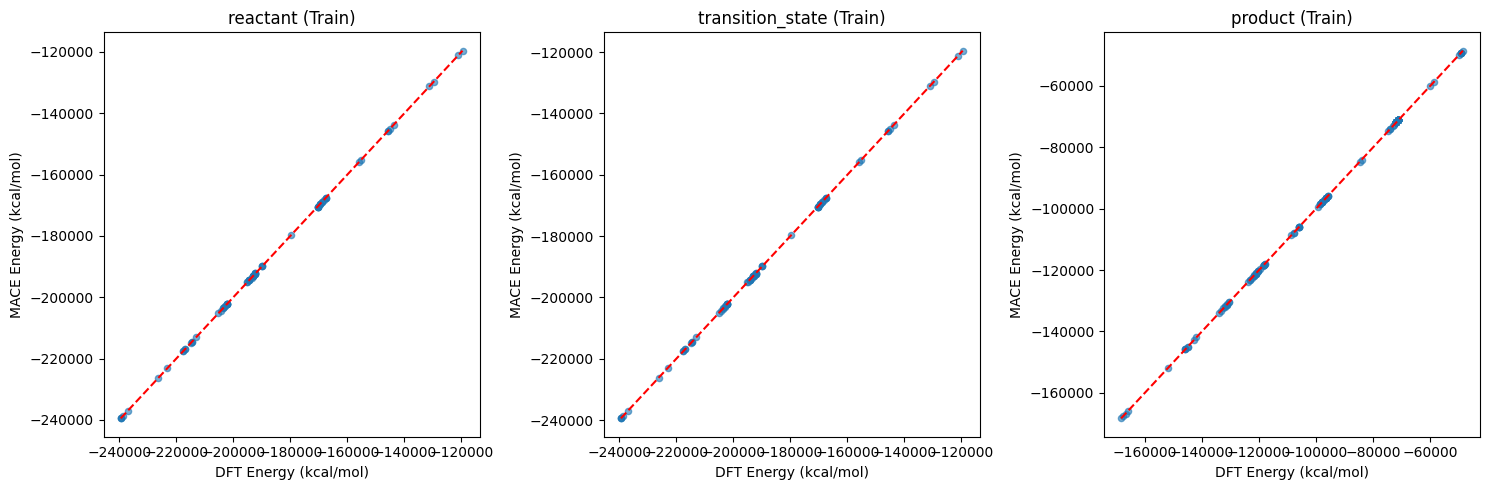

Test | reactant MAE = 20.468 kcal/mol
Test | transition_state MAE = 29.115 kcal/mol
Test | product MAE = 6.706 kcal/mol


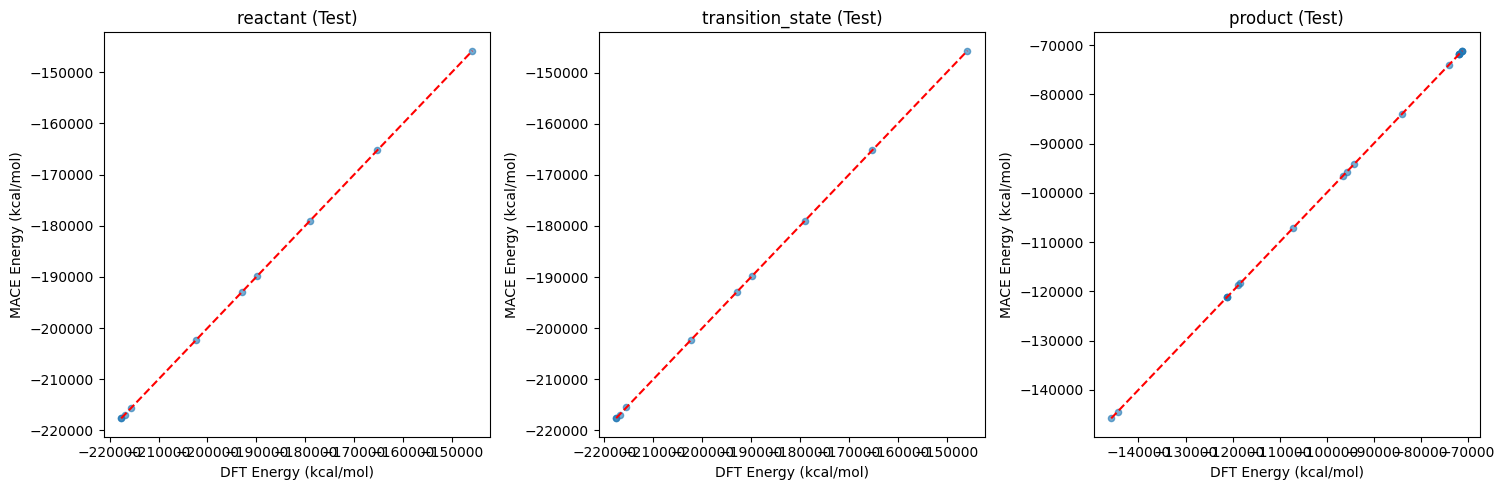

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from ase.io import read

# Conversión eV → kcal/mol
EV2KCAL = 23.0609

def plot_energy_MAE_by_type(db, label=''):
    # Tipos de estructuras
    types = ['reactant', 'transition_state', 'product']

    plt.figure(figsize=(15,5))

    for i, t in enumerate(types):
        # Filtrar por tipo
        atoms_t = [at for at in db if at.info['structure_type'] == t]

        if len(atoms_t) == 0:
            continue

        # Extraer energías y convertir
        E_DFT = np.array([at.info['energy_dft'] for at in atoms_t]) * EV2KCAL
        E_MACE = np.array([at.info['MACE_energy'] for at in atoms_t]) * EV2KCAL

        # Calcular MAE
        mae = np.mean(np.abs(E_DFT - E_MACE))
        print(f"{label} | {t} MAE = {mae:.3f} kcal/mol")

        # Scatter plot
        plt.subplot(1,3,i+1)
        plt.scatter(E_DFT, E_MACE, s=20, alpha=0.6)
        plt.plot([E_DFT.min(), E_DFT.max()], [E_DFT.min(), E_DFT.max()], 'r--')
        plt.xlabel('DFT Energy (kcal/mol)')
        plt.ylabel('MACE Energy (kcal/mol)')
        plt.title(f'{t} ({label})')

    plt.tight_layout()
    plt.show()

# -----------------------------
# Leer datasets
# -----------------------------
train_data = read('tests/RXN_TEST/train.xyz', ':')
#val_data = read('validation.xyz', ':')
test_data = read('tests/RXN_TEST/test.xyz', ':')

# -----------------------------
# Graficar comparaciones
# -----------------------------
plot_energy_MAE_by_type(train_data, label='Train')
#plot_energy_MAE_by_type(val_data, label='Validation')
plot_energy_MAE_by_type(test_data, label='Test')



MAEs Train dataset (kcal/mol):

1,2_Insertion_CO: Barrier MAE = 41.139, ΔH MAE = 17.111
2+2_cycloaddition: Barrier MAE = 43.747, ΔH MAE = 10.393


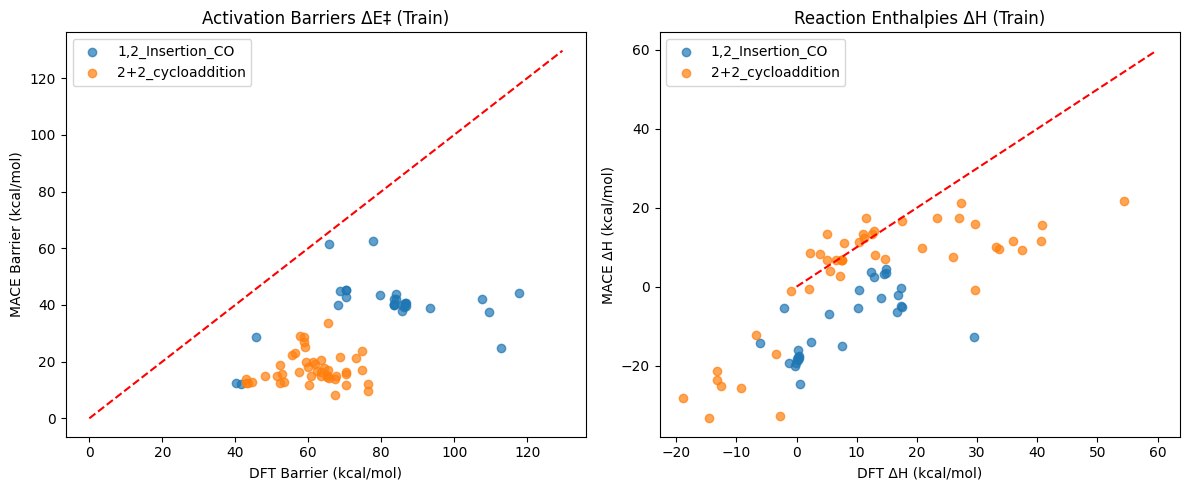


MAEs Test dataset (kcal/mol):

1,2_Insertion_CO: Barrier MAE = 48.980, ΔH MAE = 21.792
2+2_cycloaddition: Barrier MAE = 46.599, ΔH MAE = 6.863


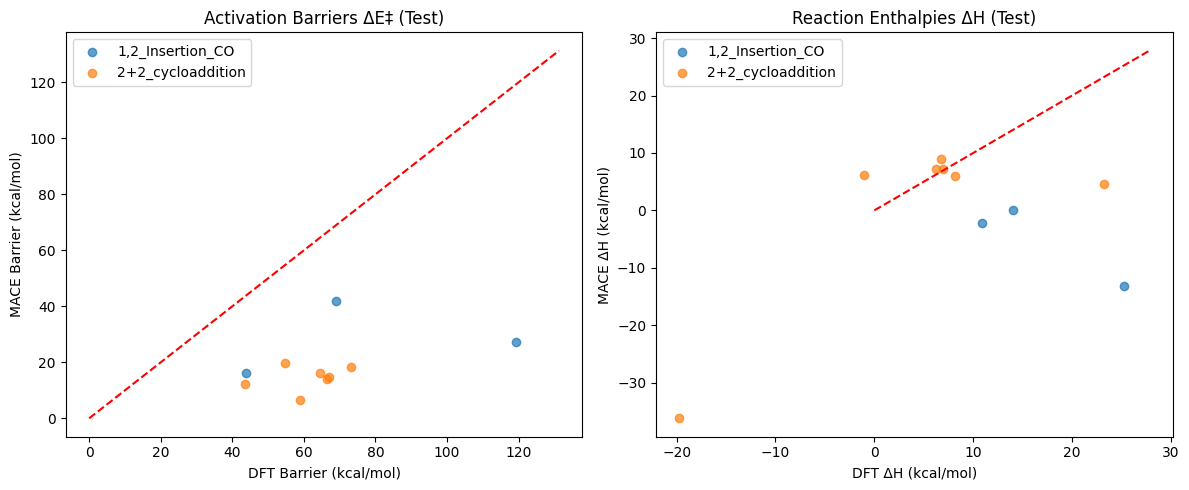

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from ase.io import read
from collections import defaultdict

EV2KCAL = 23.0609  # conversión eV → kcal/mol

# -----------------------------
# Función para calcular barreras y entalpías
# -----------------------------
def compute_barriers_entalpies(db):
    rxn_dict = defaultdict(list)
    for at in db:
        rxn_dict[at.info['reaction_id']].append(at)

    results = []
    for rxn_id, atoms in rxn_dict.items():
        # Separar por tipo
        R_atoms = [at for at in atoms if at.info['structure_type'] == 'reactant']
        TS_atoms = [at for at in atoms if at.info['structure_type'] == 'transition_state']
        P_atoms = [at for at in atoms if at.info['structure_type'] == 'product']

        if len(R_atoms) == 0 or len(TS_atoms) == 0 or len(P_atoms) == 0:
            continue

        # Energía reactivo promedio (si hay varias geometrías)
        E_R_DFT = np.mean([at.info['energy_dft'] for at in R_atoms])
        E_R_MACE = np.mean([at.info['MACE_energy'] for at in R_atoms])

        # Energía TS promedio
        E_TS_DFT = np.mean([at.info['energy_dft'] for at in TS_atoms])
        E_TS_MACE = np.mean([at.info['MACE_energy'] for at in TS_atoms])

        # Energía de productos: sumamos todas las energías de productos de la reacción
        E_P_DFT = sum([at.info['energy_dft'] for at in P_atoms])
        E_P_MACE = sum([at.info['MACE_energy'] for at in P_atoms])

        # Barrera y entalpía
        barrier_DFT = (E_TS_DFT - E_R_DFT) * EV2KCAL
        barrier_MACE = (E_TS_MACE - E_R_MACE) * EV2KCAL
        deltaH_DFT = (E_P_DFT - E_R_DFT) * EV2KCAL
        deltaH_MACE = (E_P_MACE - E_R_MACE) * EV2KCAL

        rxn_type = R_atoms[0].info.get('reaction_type', 'unknown')

        results.append({
            'reaction_id': rxn_id,
            'reaction_type': rxn_type,
            'barrier_DFT': barrier_DFT,
            'barrier_MACE': barrier_MACE,
            'deltaH_DFT': deltaH_DFT,
            'deltaH_MACE': deltaH_MACE
        })
    return results

# -----------------------------
# Función para imprimir MAEs
# -----------------------------
def print_MAEs(results, label=''):
    types = set([r['reaction_type'] for r in results])
    print(f"\nMAEs {label} dataset (kcal/mol):\n")
    for t in types:
        r_type = [r for r in results if r['reaction_type'] == t]
        barrier_MAE = np.mean([abs(r['barrier_DFT'] - r['barrier_MACE']) for r in r_type])
        deltaH_MAE = np.mean([abs(r['deltaH_DFT'] - r['deltaH_MACE']) for r in r_type])
        print(f"{t}: Barrier MAE = {barrier_MAE:.3f}, ΔH MAE = {deltaH_MAE:.3f}")

# -----------------------------
# Función para graficar scatter
# -----------------------------
def plot_barriers_entalpies(results, label=''):
    types = set([r['reaction_type'] for r in results])
    plt.figure(figsize=(12,5))

    # Barreras
    plt.subplot(1,2,1)
    for t in types:
        r_type = [r for r in results if r['reaction_type']==t]
        plt.scatter([r['barrier_DFT'] for r in r_type],
                    [r['barrier_MACE'] for r in r_type],
                    label=t, alpha=0.7)
    plt.plot([0, max([r['barrier_DFT'] for r in results])*1.1],
             [0, max([r['barrier_DFT'] for r in results])*1.1],
             'r--')
    plt.xlabel('DFT Barrier (kcal/mol)')
    plt.ylabel('MACE Barrier (kcal/mol)')
    plt.title(f'Activation Barriers ΔE‡ ({label})')
    plt.legend()

    # Entalpías
    plt.subplot(1,2,2)
    for t in types:
        r_type = [r for r in results if r['reaction_type']==t]
        plt.scatter([r['deltaH_DFT'] for r in r_type],
                    [r['deltaH_MACE'] for r in r_type],
                    label=t, alpha=0.7)
    plt.plot([0, max([r['deltaH_DFT'] for r in results])*1.1],
             [0, max([r['deltaH_DFT'] for r in results])*1.1],
             'r--')
    plt.xlabel('DFT ΔH (kcal/mol)')
    plt.ylabel('MACE ΔH (kcal/mol)')
    plt.title(f'Reaction Enthalpies ΔH ({label})')
    plt.legend()

    plt.tight_layout()
    plt.show()

# -----------------------------
# Leer datasets de evaluación
# -----------------------------
train_data = read('tests/RXN_TEST/train.xyz', ':')
test_data = read('tests/RXN_TEST/test.xyz', ':')

# -----------------------------
# Evaluación Train
# -----------------------------
train_results = compute_barriers_entalpies(train_data)
print_MAEs(train_results, label='Train')
plot_barriers_entalpies(train_results, label='Train')

# -----------------------------
# Evaluación Test
# -----------------------------
test_results = compute_barriers_entalpies(test_data)
print_MAEs(test_results, label='Test')
plot_barriers_entalpies(test_results, label='Test')


XTB


In [6]:
from ase.io import read, write
from tblite.ase import TBLite
from tqdm import tqdm

# -----------------------------
# Leer dataset DFT
# -----------------------------
db = read("all_reaction_configs_random_both.xyz", ":")

print(f"Número total de configuraciones: {len(db)}")

# -----------------------------
# Calculadora xTB (single-point)
# -----------------------------
xtb_calc = TBLite(method="GFN2-xTB", verbosity=0)

# -----------------------------
# Evaluación single-point
# -----------------------------
for at in tqdm(db, desc="Calculando energías GFN2-xTB"):
    at.calc = xtb_calc
    at.info["energy_xtb"] = at.get_potential_energy()

    # Mantener solo arrays esenciales
    essential_arrays = {"positions", "numbers"}
    for key in list(at.arrays.keys()):
        if key not in essential_arrays:
            at.arrays.pop(key)

# -----------------------------
# Escribir XYZ limpio (CLAVE)
# -----------------------------
write(
    "all_reaction_configs_xtb_sp.xyz",
    db,
    write_results=False   # 🔥 ESTA LÍNEA ES LA CLAVE
)

print("Archivo escrito correctamente: all_reaction_configs_xtb_sp.xyz")


Número total de configuraciones: 372


Calculando energías GFN2-xTB:   2%|▏         | 9/372 [00:00<00:04, 79.06it/s]

3
{'bond-orders': array([[0.00000000e+00, 2.90065331e+00, 1.17621180e-02, 3.40110438e-02,
        8.87148657e-04, 3.02364629e-02, 9.67979497e-01, 2.44426423e-02,
        9.63864483e-04, 2.05776738e-04, 1.48808933e-04, 4.05632914e-04],
       [2.90065331e+00, 0.00000000e+00, 1.03413287e+00, 4.55203776e-03,
        4.78773920e-03, 1.65422498e-02, 7.42785687e-03, 3.16727259e-03,
        3.64699271e-03, 1.81280791e-03, 1.16409316e-04, 5.08872364e-04],
       [1.17621180e-02, 1.03413287e+00, 0.00000000e+00, 9.72637052e-01,
        1.05685943e-02, 9.54719606e-01, 1.51995152e-02, 9.48658017e-01,
        6.19111632e-06, 2.30634310e-04, 3.27929656e-03, 1.97079930e-03],
       [3.40110438e-02, 4.55203776e-03, 9.72637052e-01, 0.00000000e+00,
        1.00537373e+00, 6.49168031e-03, 3.17467537e-04, 3.00840807e-04,
        9.82608426e-01, 9.81601976e-01, 1.18973553e-03, 8.30772174e-04],
       [8.87148657e-04, 4.78773920e-03, 1.05685943e-02, 1.00537373e+00,
        0.00000000e+00, 9.78549197e-01, 1.

Calculando energías GFN2-xTB:   6%|▋         | 24/372 [00:00<00:05, 64.22it/s]

{'bond-orders': array([[ 0.00000000e+00,  1.00925595e+00,  1.95624937e-02,
         4.46004977e-03,  1.96293847e-04,  1.07362764e-02,
         8.95706907e-04,  2.05594523e-02,  3.85263357e-03,
         8.87986970e-01],
       [ 1.00925595e+00,  0.00000000e+00,  9.93896606e-01,
         2.35259273e-02,  3.41744887e-04,  1.21405568e-03,
         3.23556230e-04,  9.65664746e-01,  9.71005404e-01,
        -1.15110097e-04],
       [ 1.95624937e-02,  9.93896606e-01,  0.00000000e+00,
         9.94845616e-01,  1.96393196e-04,  9.71618483e-01,
         9.70629950e-01,  8.96185925e-04,  1.40544058e-03,
         1.90042238e-03],
       [ 4.46004977e-03,  2.35259273e-02,  9.94845616e-01,
         0.00000000e+00,  9.03818630e-01,  1.50666790e-02,
         2.76269531e-03,  1.05027068e-03,  1.06132990e-02,
         6.89598771e-03],
       [ 1.96293847e-04,  3.41744887e-04,  1.96393196e-04,
         9.03818630e-01,  0.00000000e+00,  4.79302666e-04,
         1.06262754e-02,  1.01041828e-03,  2.39869097e

Calculando energías GFN2-xTB:  11%|█         | 40/372 [00:00<00:05, 66.35it/s]

{'bond-orders': array([[ 0.00000000e+00,  1.92372052e+00,  6.74430999e-02,
         2.63667476e-03,  1.61276027e-03,  1.67026866e-03,
         2.37384071e-02,  2.43243435e-02,  4.89616326e-02],
       [ 1.92372052e+00,  0.00000000e+00,  9.95450608e-01,
         2.84227439e-02,  1.27874404e-03,  1.31296378e-03,
         1.58537572e-02,  1.64221208e-02,  9.30279624e-01],
       [ 6.74430999e-02,  9.95450608e-01,  0.00000000e+00,
         1.04388876e+00, -3.24748810e-04, -3.22670033e-04,
         9.40093285e-01,  9.38781244e-01,  7.09657070e-03],
       [ 2.63667476e-03,  2.84227439e-02,  1.04388876e+00,
         0.00000000e+00,  9.61490889e-01,  9.61168898e-01,
         2.56326289e-03,  2.68749458e-03,  1.31843572e-02],
       [ 1.61276027e-03,  1.27874404e-03, -3.24748810e-04,
         9.61490889e-01,  0.00000000e+00,  1.25284178e-03,
         1.22934631e-04,  1.12007014e-02,  8.33687021e-05],
       [ 1.67026866e-03,  1.31296378e-03, -3.22670033e-04,
         9.61168898e-01,  1.2528417

Calculando energías GFN2-xTB:  15%|█▌        | 57/372 [00:00<00:04, 71.72it/s]

3
{'bond-orders': array([[0.00000000e+00, 1.09247458e+00, 2.22880966e-02, 1.09457518e-01,
        1.93277641e-02, 7.31053833e-03, 4.39065761e-03, 9.42269448e-01,
        9.46977065e-01, 2.50572430e-03, 4.01100666e-03, 7.68818337e-04],
       [1.09247458e+00, 0.00000000e+00, 9.16648786e-01, 1.31162985e+00,
        1.51905477e-01, 3.85770066e-01, 2.60057146e-02, 5.94914392e-04,
        4.82562453e-04, 8.24965610e-03, 9.42395136e-03, 1.32672077e-02],
       [2.22880966e-02, 9.16648786e-01, 0.00000000e+00, 1.01240388e+00,
        1.06666281e-02, 6.69543959e-03, 4.87279265e-03, 1.20079537e-04,
        1.79581832e-02, 9.52148390e-01, 9.61066298e-01, 1.52579289e-02],
       [1.09457518e-01, 1.31162985e+00, 1.01240388e+00, 0.00000000e+00,
        9.14288598e-02, 1.64657862e-01, 1.73950600e-01, 1.74927568e-02,
        2.62522740e-03, 8.76970276e-04, 4.40011004e-03, 9.56166333e-01],
       [1.93277641e-02, 1.51905477e-01, 1.06666281e-02, 9.14288598e-02,
        0.00000000e+00, 1.55843200e+00, 2.

Calculando energías GFN2-xTB:  20%|█▉        | 74/372 [00:01<00:03, 76.50it/s]

3
{'bond-orders': array([[0.00000000e+00, 1.03454571e+00, 7.56661475e-03, 8.99669385e-03,
        3.41781632e-03, 1.75636864e-02, 6.97660788e-04, 9.78409430e-01,
        9.73242030e-01, 9.73156317e-01],
       [1.03454571e+00, 0.00000000e+00, 1.84190696e+00, 1.30391062e-01,
        1.49497321e-03, 1.21180347e-03, 9.67917655e-01, 9.65111991e-05,
        5.35635462e-04, 5.39055328e-04],
       [7.56661475e-03, 1.84190696e+00, 0.00000000e+00, 1.08206745e+00,
        2.38254379e-04, 9.60071536e-01, 3.00317770e-03, 1.59090291e-03,
        2.01471569e-02, 2.02392298e-02],
       [8.99669385e-03, 1.30391062e-01, 1.08206745e+00, 0.00000000e+00,
        8.83688797e-01, 2.61385425e-03, 1.49921924e-02, 7.77254009e-04,
        3.24169220e-03, 3.26529513e-03],
       [3.41781632e-03, 1.49497321e-03, 2.38254379e-04, 8.83688797e-01,
        0.00000000e+00, 1.44693342e-02, 9.76598230e-06, 7.98100234e-03,
        2.17592989e-04, 2.06826981e-04],
       [1.75636864e-02, 1.21180347e-03, 9.60071536e-01, 2

Calculando energías GFN2-xTB:  22%|██▏       | 82/372 [00:01<00:04, 67.64it/s]

3
{'bond-orders': array([[ 0.00000000e+00,  1.01521226e+00,  4.86944164e-03,
         4.78391454e-03,  1.51635178e-02,  9.80950209e-01,
         9.84373294e-01,  9.82650614e-01,  5.16278942e-04,
         3.55674955e-03,  2.10543428e-03,  1.96305055e-04,
         3.98372860e-04],
       [ 1.01521226e+00,  0.00000000e+00,  9.90645820e-01,
         1.15280506e-02,  9.59118550e-01,  3.69252398e-04,
         1.17328958e-04,  1.82365699e-03,  9.65522911e-01,
         1.29731670e-04,  2.70679105e-04,  3.92909717e-03,
         1.51993451e-03],
       [ 4.86944164e-03,  9.90645820e-01,  0.00000000e+00,
         1.00536028e+00,  7.20764761e-03,  1.30371496e-02,
         1.02493970e-03,  7.39935824e-04,  7.05978383e-04,
         9.83265433e-01,  9.80531027e-01,  1.56455573e-03,
         7.34464520e-04],
       [ 4.78391454e-03,  1.15280506e-02,  1.00536028e+00,
         0.00000000e+00,  9.80106186e-01,  1.97941201e-04,
        -4.35502639e-07,  2.31667830e-04,  1.13213530e-03,
         2.99711299

Calculando energías GFN2-xTB:  24%|██▍       | 89/372 [00:01<00:05, 56.22it/s]

3
{'bond-orders': array([[ 0.00000000e+00,  9.73185813e-01,  2.56454335e-02,
         1.50154278e-02,  1.43228879e-02,  3.84599933e-03,
         5.74769195e-03,  9.83875114e-01,  9.85655199e-01,
         9.78234950e-01, -2.47866473e-04,  1.78620923e-04,
         1.12480001e-03,  5.46576080e-05,  4.33829236e-04,
         2.33152021e-04,  4.61327666e-04],
       [ 9.73185813e-01,  0.00000000e+00,  1.01763748e+00,
         1.05891272e+00,  8.70831958e-03,  7.71136355e-03,
         6.33619683e-03,  2.67702530e-04,  7.69197191e-04,
        -5.65720161e-05,  8.81689530e-01,  1.31709304e-03,
         1.27211447e-03,  1.21820019e-02,  1.97298781e-03,
         3.77125835e-04,  5.33571267e-04],
       [ 2.56454335e-02,  1.01763748e+00,  0.00000000e+00,
         4.12523628e-02,  4.58506830e-03,  9.96342625e-03,
         2.39385915e-02,  7.08111044e-04,  1.05439815e-02,
         4.96095433e-04,  6.17112950e-03,  8.10243801e-01,
         1.00892228e-02,  5.60457547e-04,  2.47227460e-03,
         1.

Calculando energías GFN2-xTB:  27%|██▋       | 101/372 [00:01<00:05, 47.25it/s]

3
{'bond-orders': array([[ 0.00000000e+00,  1.03191516e+00,  6.14523612e-03,
         5.50275235e-03,  2.06918838e-04,  1.56291359e-03,
         1.68098525e-02,  1.03229212e-03,  9.76380128e-01,
         9.71342510e-01,  9.86727326e-01],
       [ 1.03191516e+00,  0.00000000e+00,  1.81620710e+00,
         1.36598309e-01,  1.48376141e-02,  3.61422604e-03,
         7.12118539e-04,  9.70206712e-01,  2.03090829e-04,
         4.33010007e-04, -1.28786144e-04],
       [ 6.14523612e-03,  1.81620710e+00,  0.00000000e+00,
         1.14184219e+00,  1.40807909e-04,  8.85930894e-05,
         9.65413306e-01,  1.76144881e-03,  8.20361102e-03,
         2.06269619e-02,  8.94263051e-03],
       [ 5.50275235e-03,  1.36598309e-01,  1.14184219e+00,
         0.00000000e+00,  9.60791387e-01,  9.53398461e-01,
         1.44590995e-03,  1.52045616e-02,  3.11227180e-03,
         4.90958735e-03,  1.13925100e-03],
       [ 2.06918838e-04,  1.48376141e-02,  1.40807909e-04,
         9.60791387e-01,  0.00000000e+00,  

Calculando energías GFN2-xTB:  28%|██▊       | 106/372 [00:01<00:06, 40.47it/s]

3
{'bond-orders': array([[ 0.00000000e+00,  1.00388893e+00,  4.82163192e-03,
         5.40800038e-03,  1.81227812e-02,  4.73330318e-04,
         9.76845394e-01,  9.75462976e-01,  9.77342536e-01],
       [ 1.00388893e+00,  0.00000000e+00,  1.27159566e+00,
         2.19201853e-01,  6.17892920e-03,  9.48568922e-01,
         3.56421483e-03, -3.26414226e-04,  3.33299815e-03],
       [ 4.82163192e-03,  1.27159566e+00,  0.00000000e+00,
         1.73255237e+00,  9.24035158e-01, -2.67229713e-04,
         1.09776926e-02,  1.56153779e-03,  1.09440731e-02],
       [ 5.40800038e-03,  2.19201853e-01,  1.73255237e+00,
         0.00000000e+00,  5.02607602e-02,  1.24739431e-02,
         5.46281420e-03,  3.50350146e-03,  5.17295377e-03],
       [ 1.81227812e-02,  6.17892920e-03,  9.24035158e-01,
         5.02607602e-02,  0.00000000e+00,  1.28869606e-04,
         3.33256836e-04,  5.73303008e-04,  3.62880096e-04],
       [ 4.73330318e-04,  9.48568922e-01, -2.67229713e-04,
         1.24739431e-02,  1.28869

Calculando energías GFN2-xTB:  30%|██▉       | 111/372 [00:02<00:08, 29.33it/s]

3
{'bond-orders': array([[0.00000000e+00, 9.76722304e-01, 9.78902398e-01, 1.01685326e+00,
        1.04494584e-03, 7.47871531e-04, 9.13048123e-01, 2.03115449e-02,
        3.18557297e-02, 4.94981132e-03, 1.27291366e-03],
       [9.76722304e-01, 0.00000000e+00, 5.13150465e-04, 7.47933677e-04,
        6.75297630e-03, 1.40707463e-03, 7.55377823e-04, 1.60865193e-03,
        1.83394352e-03, 3.52279651e-04, 5.29874529e-03],
       [9.78902398e-01, 5.13150465e-04, 0.00000000e+00, 1.04883118e-03,
        1.23855037e-03, 6.73321598e-03, 3.75439647e-04, 5.70042560e-03,
        1.88859245e-03, 3.36285865e-04, 1.02506256e-03],
       [1.01685326e+00, 7.47933677e-04, 1.04883118e-03, 0.00000000e+00,
        9.78928985e-01, 9.76719495e-01, 9.13266352e-01, 2.01639427e-02,
        3.16094370e-02, 5.04850545e-03, 1.25909181e-03],
       [1.04494584e-03, 6.75297630e-03, 1.23855037e-03, 9.78928985e-01,
        0.00000000e+00, 5.14167610e-04, 3.60175623e-04, 5.69731137e-03,
        1.86990498e-03, 3.38150445

Calculando energías GFN2-xTB:  32%|███▏      | 118/372 [00:02<00:10, 23.84it/s]

3
{'bond-orders': array([[ 0.00000000e+00,  1.84959241e+00,  9.80008508e-02,
         3.48974689e-02,  4.22768911e-02,  9.46046085e-01,
         3.84832154e-02,  1.92566777e-03,  1.60581701e-05],
       [ 1.84959241e+00,  0.00000000e+00,  1.14590832e+00,
         2.96540534e-03,  2.19487385e-02,  4.31753701e-03,
         9.36474493e-01, -2.23777836e-04,  5.25758022e-04],
       [ 9.80008508e-02,  1.14590832e+00,  0.00000000e+00,
         1.19151685e+00,  1.65084945e-01,  1.91294951e-02,
         2.88459427e-03,  9.16473321e-01,  6.74947534e-03],
       [ 3.48974689e-02,  2.96540534e-03,  1.19151685e+00,
         0.00000000e+00,  1.79348666e+00,  1.34713799e-03,
         6.68230912e-04, -1.30132911e-04,  9.20980841e-01],
       [ 4.22768911e-02,  2.19487385e-02,  1.65084945e-01,
         1.79348666e+00,  0.00000000e+00,  1.04679106e-03,
         4.55125858e-05,  1.59200121e-03,  5.02310526e-02],
       [ 9.46046085e-01,  4.31753701e-03,  1.91294951e-02,
         1.34713799e-03,  1.04679

Calculando energías GFN2-xTB:  34%|███▎      | 125/372 [00:03<00:13, 17.94it/s]

3
{'bond-orders': array([[0.        , 2.01572407, 0.0485553 , 0.04857313],
       [2.01572407, 0.        , 0.94324074, 0.94322298],
       [0.0485553 , 0.94324074, 0.        , 0.00622783],
       [0.04857313, 0.94322298, 0.00622783, 0.        ]])}
{'bond-orders': array([[0.        , 2.01572407, 0.0485553 , 0.04857313],
       [2.01572407, 0.        , 0.94324074, 0.94322298],
       [0.0485553 , 0.94324074, 0.        , 0.00622783],
       [0.04857313, 0.94322298, 0.00622783, 0.        ]]), 'molecular-dipole': array([ 0.82185105,  0.13597325, -0.40127315])}
{'bond-orders': array([[0.        , 2.01572407, 0.0485553 , 0.04857313],
       [2.01572407, 0.        , 0.94324074, 0.94322298],
       [0.0485553 , 0.94324074, 0.        , 0.00622783],
       [0.04857313, 0.94322298, 0.00622783, 0.        ]]), 'molecular-dipole': array([ 0.82185105,  0.13597325, -0.40127315]), 'molecular-quadrupole': array([-6.75345888,  5.48002181,  4.91720805,  9.03982587, -2.99674239,
        1.83625082])}
3
{'bo

Calculando energías GFN2-xTB:  36%|███▌      | 133/372 [00:03<00:09, 24.03it/s]

3
{'bond-orders': array([[ 0.00000000e+00,  9.94458827e-01,  6.36616624e-03,
         9.34508239e-04,  6.15861765e-04,  4.39245580e-04,
         2.99527553e-03,  9.02494041e-01,  1.68173517e-02,
         1.60457008e-02,  1.16354195e-03,  9.22283240e-03,
         4.63223517e-06,  1.52116439e-05,  1.07273612e-05,
         7.52261959e-05,  1.19000915e-04],
       [ 9.94458827e-01,  0.00000000e+00,  9.92725953e-01,
         2.82078020e-03,  5.76234017e-03,  9.41141605e-03,
         1.16822384e-02,  1.92892563e-04,  9.68456007e-01,
         9.71894156e-01, -1.74260155e-05,  1.15751203e-03,
         1.04204640e-04,  3.44939856e-05,  8.00531488e-05,
         3.37111694e-05,  5.43000592e-06],
       [ 6.36616624e-03,  9.92725953e-01,  0.00000000e+00,
         1.01269782e+00,  3.77231890e-03,  4.53485191e-03,
         7.93238020e-03,  1.06956324e-02, -2.52728019e-04,
         2.23998381e-05,  9.68171758e-01,  9.71841893e-01,
         1.72119660e-03,  8.43692492e-04,  1.08827037e-04,
         1.

Calculando energías GFN2-xTB:  37%|███▋      | 139/372 [00:03<00:09, 24.81it/s]

3
{'bond-orders': array([[ 0.00000000e+00,  9.84770281e-01,  3.86806899e-03,
         2.74365322e-03,  1.44433348e-03,  1.47516395e-02,
         3.80649191e-04,  9.77630998e-01,  9.77731139e-01,
         9.80053064e-01,  1.15241464e-03,  1.87754361e-04,
         1.28540256e-04,  1.19963316e-03,  1.64837344e-05,
         4.10934253e-05,  3.97264648e-05],
       [ 9.84770281e-01,  0.00000000e+00,  1.01425680e+00,
         1.63914080e-02,  1.41173809e-02,  4.22097910e-02,
         2.49599434e-03,  1.47353169e-02,  1.54823385e-02,
         1.54052476e-03,  1.58334264e-02,  1.32841131e-03,
         1.83492499e-04,  9.61149929e-03,  3.76637849e-04,
         1.88461516e-03,  2.48473305e-03],
       [ 3.86806899e-03,  1.01425680e+00,  0.00000000e+00,
         5.08635646e-01,  1.45432404e-01,  1.27249633e+00,
         7.56394150e-03,  9.29679339e-04,  1.15327079e-03,
         1.25480143e-02,  9.44431473e-01,  1.59879814e-03,
         1.22732506e-03,  1.66632149e-03,  1.06688143e-02,
         4.

Calculando energías GFN2-xTB:  38%|███▊      | 142/372 [00:03<00:10, 22.79it/s]

3
{'bond-orders': array([[ 0.00000000e+00,  9.90638530e-01,  4.37709596e-03,
         1.72238416e-03,  7.33738452e-04,  1.64756522e-02,
         4.27426234e-04,  9.78245436e-01,  9.76200061e-01,
         9.79404507e-01,  9.92533762e-04,  3.06302345e-04,
         2.27781611e-05,  5.12278927e-04, -4.16671175e-07,
         1.60793738e-05,  6.92310342e-07],
       [ 9.90638530e-01,  0.00000000e+00,  9.95822411e-01,
         3.00101657e-02,  4.87617084e-03,  6.85268093e-03,
         2.67130484e-03,  1.71838774e-02,  1.76605171e-02,
         1.65524252e-03,  1.67748624e-02,  2.24551478e-03,
         3.95479273e-03,  3.13015799e-03,  7.08523404e-05,
         8.43784116e-05,  4.56141836e-04],
       [ 4.37709596e-03,  9.95822411e-01,  0.00000000e+00,
         9.76575497e-01,  8.32031606e-03,  9.69210554e-01,
         3.72768344e-03,  6.89285458e-04,  9.18091468e-04,
         1.29575251e-02,  9.61670460e-01,  1.41450846e-03,
         1.55258939e-03,  1.25508714e-03,  7.26743371e-04,
         1.

Calculando energías GFN2-xTB:  39%|███▉      | 146/372 [00:03<00:08, 25.47it/s]

{'bond-orders': array([[ 0.00000000e+00,  9.97909484e-01,  5.39271014e-03,
         5.46858256e-03,  1.60288733e-02,  4.05065848e-03,
         1.24864999e-03,  9.82312078e-01,  9.81912629e-01,
         9.85146493e-01,  1.22382835e-03,  5.36075896e-03,
         1.32453881e-03,  5.84486660e-03,  2.93765313e-03],
       [ 9.97909484e-01,  0.00000000e+00,  9.39411292e-01,
         9.40434457e-01,  1.01423262e+00,  1.63901178e-02,
         5.41802711e-03,  1.41300474e-04,  1.66348572e-04,
         1.04955542e-03,  1.46874106e-03,  1.78136963e-03,
         1.38910205e-03,  1.19651558e-03,  8.21634734e-04],
       [ 5.39271014e-03,  9.39411292e-01,  0.00000000e+00,
         9.69702373e-01,  2.28294347e-02,  1.25948053e-02,
         5.88419670e-03,  1.45944599e-03,  1.30715150e-02,
         3.22234946e-04,  9.81041354e-01,  9.79641643e-01,
         1.87209073e-03,  1.30680631e-03,  8.88200456e-04],
       [ 5.46858256e-03,  9.40434457e-01,  9.69702373e-01,
         0.00000000e+00,  1.20196987e

Calculando energías GFN2-xTB:  42%|████▏     | 157/372 [00:04<00:07, 28.46it/s]

3
{'bond-orders': array([[ 0.00000000e+00,  1.00078399e+00,  2.16826371e-02,
         2.30421748e-04,  6.94629205e-03,  1.04814776e-03,
         5.47572543e-03,  5.12564377e-03,  1.19828925e-03,
         5.61480889e-03,  9.81867064e-01,  9.81294738e-01,
         9.84569347e-01],
       [ 1.00078399e+00,  0.00000000e+00,  9.85035725e-01,
        -1.87281333e-04,  9.51365588e-01,  1.63406141e-03,
         1.63256956e-03,  9.67458189e-01,  1.45131405e-03,
         1.16013065e-03,  1.14599780e-04,  1.49993281e-04,
         1.31417258e-03],
       [ 2.16826371e-02,  9.85035725e-01,  0.00000000e+00,
         8.99661646e-01,  2.85499525e-02,  6.04895320e-03,
         1.88974485e-03,  9.06949839e-03,  5.19701133e-03,
         2.49035382e-03,  6.54354436e-04,  4.32107199e-04,
         1.05292707e-02],
       [ 2.30421748e-04, -1.87281333e-04,  8.99661646e-01,
         0.00000000e+00,  1.28161873e-03,  2.14955865e-05,
         4.32498425e-04,  1.52563730e-02,  5.02596637e-04,
         6.96412411

Calculando energías GFN2-xTB:  46%|████▌     | 170/372 [00:04<00:04, 41.89it/s]

3
{'bond-orders': array([[0.00000000e+00, 9.72832421e-01, 4.86012606e-03, 2.06476930e-03,
        3.79217094e-04, 5.00618838e-03, 3.63785970e-03, 9.77552467e-01,
        9.79404116e-01, 9.79417308e-01, 1.35871093e-02, 4.53298216e-05,
        3.45605501e-05],
       [9.72832421e-01, 0.00000000e+00, 1.04861282e+00, 5.10104717e-02,
        2.96547727e-02, 7.33853970e-02, 2.84242449e-02, 1.29303686e-02,
        1.60330930e-03, 1.06151528e-02, 5.61074141e-03, 1.07169499e-04,
        4.95223105e-04],
       [4.86012606e-03, 1.04861282e+00, 0.00000000e+00, 2.29188114e-01,
        7.52639593e-02, 1.37792655e+00, 1.70827600e-01, 1.32492182e-03,
        1.17160289e-02, 1.32419724e-03, 9.45282312e-01, 6.55220279e-04,
        8.20941039e-04],
       [2.06476930e-03, 5.10104717e-02, 2.29188114e-01, 0.00000000e+00,
        1.57100348e+00, 8.93489489e-02, 7.26513716e-02, 1.57083833e-03,
        2.12518060e-04, 2.53767573e-03, 3.50902532e-03, 9.54942274e-01,
        9.51445038e-01],
       [3.79217094

Calculando energías GFN2-xTB:  49%|████▉     | 183/372 [00:04<00:03, 49.65it/s]

3
{'bond-orders': array([[ 0.00000000e+00,  1.01883956e+00,  2.48448810e-03,
         2.16295799e-03,  2.65292897e-03,  4.15054617e-03,
         9.83445870e-01,  9.83447865e-01,  9.83758990e-01,
        -1.31824594e-04,  2.26247118e-03,  5.71883200e-03,
         5.89998965e-03,  1.78740823e-04,  4.29758994e-05,
         4.53635813e-04],
       [ 1.01883956e+00,  0.00000000e+00,  9.90998551e-01,
         7.92461563e-03,  9.72925371e-01,  5.16309469e-03,
        -3.89701110e-05,  5.34747520e-06, -2.23232184e-05,
         9.75103109e-01,  1.96894630e-03,  5.40698810e-04,
         4.28737028e-04,  1.33127764e-02,  6.93122808e-04,
         1.04771660e-03],
       [ 2.48448810e-03,  9.90998551e-01,  0.00000000e+00,
         9.79279515e-01,  1.14387803e-02,  5.37352480e-03,
         1.20804902e-02,  8.59148545e-04,  1.10659360e-03,
         2.12945742e-04,  9.73952988e-01,  9.74454499e-01,
         7.60594450e-04,  1.82070927e-04,  2.53716106e-04,
        -1.73749892e-07],
       [ 2.16295799

Calculando energías GFN2-xTB:  52%|█████▏    | 195/372 [00:04<00:03, 49.93it/s]

{'bond-orders': array([[ 0.00000000e+00,  1.79256801e+00,  2.25079705e-01,
         2.23441460e-01,  2.83140314e-03,  6.38251451e-03,
         1.87381471e-02,  9.28734717e-01,  3.77009789e-04,
         8.37808961e-03,  8.00639219e-03,  9.44601774e-04,
         7.86501325e-04,  3.94998215e-03],
       [ 1.79256801e+00,  0.00000000e+00,  1.52418975e+00,
         1.12579191e-01,  3.11559953e-03,  1.48011306e-03,
         4.74521997e-01,  9.78759597e-03,  1.52059667e-04,
         3.63673188e-03,  4.12576461e-03,  1.77862260e-03,
         3.62670347e-03,  2.14702603e-03],
       [ 2.25079705e-01,  1.52418975e+00,  0.00000000e+00,
         1.17710036e-01,  5.17866731e-03,  4.32758517e-03,
         1.39319881e-01,  2.00433806e-02,  1.65673062e-04,
         2.80686877e-03,  3.25784727e-03,  1.20082936e-03,
         3.96317936e-03,  5.86316192e-03],
       [ 2.23441460e-01,  1.12579191e-01,  1.17710036e-01,
         0.00000000e+00,  1.06139340e+00,  1.28929564e-02,
         1.33515912e+00,  8.1

Calculando energías GFN2-xTB:  55%|█████▌    | 206/372 [00:05<00:03, 47.77it/s]

3
{'bond-orders': array([[ 0.00000000e+00,  1.02491881e+00,  2.48346511e-02,
         5.90389963e-04,  2.10625858e-03,  1.53564489e-02,
         8.44780153e-01,  4.38942049e-03,  2.20271116e-02,
         2.27726353e-03,  9.10857686e-03,  2.16639562e-04,
         1.03015873e-03],
       [ 1.02491881e+00,  0.00000000e+00,  9.85957181e-01,
         7.93581486e-03,  6.55732009e-03,  5.06525713e-03,
         5.22541491e-04,  9.69519100e-01,  9.64857762e-01,
         4.18139545e-04,  4.03370137e-04,  4.52998599e-03,
         6.36773452e-05],
       [ 2.48346511e-02,  9.85957181e-01,  0.00000000e+00,
         9.79468519e-01,  5.64372595e-03,  2.38902945e-03,
         1.47227662e-03,  1.88823570e-03,  1.25811138e-03,
         9.63177200e-01,  9.77411723e-01,  4.47924783e-05,
         1.91396794e-02],
       [ 5.90389963e-04,  7.93581486e-03,  9.79468519e-01,
         0.00000000e+00,  1.29647842e+00,  2.15393659e-01,
         3.46849854e-04,  9.23097434e-03,  2.00119611e-03,
         3.02303485

Calculando energías GFN2-xTB:  59%|█████▊    | 218/372 [00:05<00:03, 51.15it/s]

3
{'bond-orders': array([[ 0.00000000e+00,  1.02452685e+00,  3.75005032e-03,
         4.60406549e-04,  9.73794211e-03,  4.74493332e-04,
         7.41304244e-03,  1.90637365e-03,  1.77716748e-02,
         9.72555446e-01,  9.72781405e-01,  9.85468229e-01],
       [ 1.02452685e+00,  0.00000000e+00,  1.02458765e+00,
         2.01532460e-03, -1.28034089e-04,  1.98544362e-03,
         1.92944951e+00,  7.26890178e-04,  7.19747801e-04,
         2.02215294e-03,  1.98251090e-03, -1.31663012e-04],
       [ 3.75005032e-03,  1.02458765e+00,  0.00000000e+00,
         9.72571438e-01,  9.85448248e-01,  9.72731160e-01,
         7.40403392e-03,  1.77652525e-02,  1.91143945e-03,
         4.56766148e-04,  4.75606553e-04,  9.72034726e-03],
       [ 4.60406549e-04,  2.01532460e-03,  9.72571438e-01,
         0.00000000e+00,  4.55368797e-05,  4.08888403e-04,
         2.22433268e-02,  3.42620421e-04,  1.64953629e-06,
         1.11889838e-04,  6.47312499e-05,  4.49152556e-06],
       [ 9.73794211e-03, -1.280340

Calculando energías GFN2-xTB:  62%|██████▏   | 230/372 [00:05<00:02, 54.30it/s]

3
{'bond-orders': array([[0.        , 2.01569006, 0.94321555, 0.94324247],
       [2.01569006, 0.        , 0.04855619, 0.048527  ],
       [0.94321555, 0.04855619, 0.        , 0.00624861],
       [0.94324247, 0.048527  , 0.00624861, 0.        ]])}
{'bond-orders': array([[0.        , 2.01569006, 0.94321555, 0.94324247],
       [2.01569006, 0.        , 0.04855619, 0.048527  ],
       [0.94321555, 0.04855619, 0.        , 0.00624861],
       [0.94324247, 0.048527  , 0.00624861, 0.        ]]), 'molecular-dipole': array([ 0.60743421, -0.57323729,  0.39694976])}
{'bond-orders': array([[0.        , 2.01569006, 0.94321555, 0.94324247],
       [2.01569006, 0.        , 0.04855619, 0.048527  ],
       [0.94321555, 0.04855619, 0.        , 0.00624861],
       [0.94324247, 0.048527  , 0.00624861, 0.        ]]), 'molecular-dipole': array([ 0.60743421, -0.57323729,  0.39694976]), 'molecular-quadrupole': array([-3.7752063 ,  0.48290233,  5.18269497, -7.92281186,  1.91481387,
       -1.40748867])}
3
{'bo

Calculando energías GFN2-xTB:  65%|██████▌   | 242/372 [00:05<00:02, 52.54it/s]

{'bond-orders': array([[ 0.00000000e+00,  1.02048677e+00,  2.52645470e-03,
         6.41109051e-04,  6.77631585e-04,  1.00208272e-02,
        -2.66512785e-04, -2.58379372e-04,  9.87786701e-01,
         9.87715628e-01,  9.87622090e-01],
       [ 1.02048677e+00,  0.00000000e+00,  1.02044544e+00,
        -7.86945251e-05, -8.31491400e-05, -2.80901653e-04,
         9.79010448e-01,  9.79008507e-01, -7.87177214e-05,
        -8.28843102e-05, -2.80118643e-04],
       [ 2.52645470e-03,  1.02044544e+00,  0.00000000e+00,
         9.87776086e-01,  9.87739992e-01,  9.87640772e-01,
        -2.63596107e-04, -2.62732743e-04,  6.38067418e-04,
         6.83333352e-04,  1.00353464e-02],
       [ 6.41109051e-04, -7.86945251e-05,  9.87776086e-01,
         0.00000000e+00,  2.79094829e-05,  3.76273791e-05,
         9.47881307e-03,  4.73648982e-04,  5.92886045e-04,
         3.99690357e-06, -1.35153159e-06],
       [ 6.77631585e-04, -8.31491400e-05,  9.87739992e-01,
         2.79094829e-05,  0.00000000e+00,  3.

Calculando energías GFN2-xTB:  67%|██████▋   | 248/372 [00:06<00:02, 52.98it/s]

3
{'bond-orders': array([[0.        , 2.01567629, 0.9432524 , 0.94324385],
       [2.01567629, 0.        , 0.04852281, 0.04853534],
       [0.9432524 , 0.04852281, 0.        , 0.00624158],
       [0.94324385, 0.04853534, 0.00624158, 0.        ]])}
{'bond-orders': array([[0.        , 2.01567629, 0.9432524 , 0.94324385],
       [2.01567629, 0.        , 0.04852281, 0.04853534],
       [0.9432524 , 0.04852281, 0.        , 0.00624158],
       [0.94324385, 0.04853534, 0.00624158, 0.        ]]), 'molecular-dipole': array([-0.44635769, -0.03811508,  0.80899344])}
{'bond-orders': array([[0.        , 2.01567629, 0.9432524 , 0.94324385],
       [2.01567629, 0.        , 0.04852281, 0.04853534],
       [0.9432524 , 0.04852281, 0.        , 0.00624158],
       [0.94324385, 0.04853534, 0.00624158, 0.        ]]), 'molecular-dipole': array([-0.44635769, -0.03811508,  0.80899344]), 'molecular-quadrupole': array([-1.78425059,  4.51637338,  2.83845105,  9.58095386, -7.35773343,
       -1.05420046])}
3
{'bo

Calculando energías GFN2-xTB:  71%|███████   | 263/372 [00:06<00:01, 57.35it/s]

3
{'bond-orders': array([[0.00000000e+00, 1.93306103e+00, 5.84125449e-02, 2.73214871e-02,
        5.32085071e-04, 2.80399363e-02, 4.94627549e-02, 1.04834581e-03,
        2.27480511e-03, 4.35296189e-04, 4.27295629e-04, 2.33108067e-03],
       [1.93306103e+00, 0.00000000e+00, 1.00954096e+00, 1.31524720e-02,
        2.48790443e-03, 1.36882863e-02, 9.28477166e-01, 2.08891961e-05,
        6.18780927e-03, 1.86476224e-03, 1.86642667e-03, 6.19276384e-03],
       [5.84125449e-02, 1.00954096e+00, 0.00000000e+00, 9.65842236e-01,
        7.89879418e-03, 9.64564177e-01, 7.85844838e-03, 9.68678535e-01,
        3.80254787e-04, 1.47267839e-03, 1.47811462e-03, 3.71078370e-04],
       [2.73214871e-02, 1.31524720e-02, 9.65842236e-01, 0.00000000e+00,
        9.81194977e-01, 1.52228629e-02, 2.75083783e-04, 3.59957869e-04,
        9.71011648e-01, 9.72647071e-01, 3.06246993e-03, 1.62367503e-03],
       [5.32085071e-04, 2.48790443e-03, 7.89879418e-03, 9.81194977e-01,
        0.00000000e+00, 9.81362908e-01, 6.

Calculando energías GFN2-xTB:  74%|███████▍  | 275/372 [00:06<00:01, 52.34it/s]

3
{'bond-orders': array([[0.        , 2.61195407],
       [2.61195407, 0.        ]])}
{'bond-orders': array([[0.        , 2.61195407],
       [2.61195407, 0.        ]]), 'molecular-dipole': array([ 0.08417348,  0.22045626, -0.06690126])}
{'bond-orders': array([[0.        , 2.61195407],
       [2.61195407, 0.        ]]), 'molecular-dipole': array([ 0.08417348,  0.22045626, -0.06690126]), 'molecular-quadrupole': array([ 1.77275751,  0.05869013, -3.64476822, -1.32088618, -0.95854817,
        1.87201071])}
3
{'bond-orders': array([[ 0.00000000e+00,  1.02051543e+00,  1.96811732e-03,
         9.74105176e-03,  3.91706708e-05,  1.65570289e-05,
         1.03453670e-03,  1.21348655e-03,  1.67574383e-05,
         2.04133695e-04,  8.49977387e-04, -2.73032582e-04,
        -2.36886306e-04,  9.87608180e-01,  9.85919343e-01,
         9.87222145e-01],
       [ 1.02051543e+00,  0.00000000e+00,  9.94245200e-01,
         3.01801154e-03,  3.70837928e-04,  7.71584480e-04,
         9.60294882e-03,  5.8655301

Calculando energías GFN2-xTB:  78%|███████▊  | 289/372 [00:06<00:01, 53.29it/s]

3
{'bond-orders': array([[0.00000000e+00, 1.00682978e+00, 3.61044279e-03, 3.73827977e-03,
        6.95651006e-03, 2.99109170e-03, 8.45811225e-03, 9.82991431e-01,
        9.80126445e-01, 9.79749679e-01, 1.02979879e-02, 5.25792566e-04,
        3.37952612e-04, 3.92318113e-03, 1.04689282e-03],
       [1.00682978e+00, 0.00000000e+00, 1.00699543e+00, 9.75337791e-01,
        1.14259987e-02, 1.00741568e-02, 9.00729706e-01, 2.52858831e-04,
        2.73470281e-03, 4.46038893e-04, 2.49687161e-04, 4.51779146e-04,
        2.76462092e-03, 4.73902326e-04, 4.88116504e-04],
       [3.61044279e-03, 1.00699543e+00, 0.00000000e+00, 3.78169551e-03,
        6.95093242e-03, 2.95374730e-03, 8.48659532e-03, 1.02728570e-02,
        3.30077895e-04, 5.28644634e-04, 9.82969348e-01, 9.79713654e-01,
        9.80072858e-01, 1.05110436e-03, 3.87657942e-03],
       [3.73827977e-03, 9.75337791e-01, 3.78169551e-03, 0.00000000e+00,
        9.60606586e-01, 8.14661608e-02, 1.51483082e-02, 7.78909821e-04,
        6.18018522e

Calculando energías GFN2-xTB:  79%|███████▉  | 295/372 [00:06<00:01, 45.81it/s]

3
{'bond-orders': array([[ 0.00000000e+00,  9.60043662e-01,  4.02935979e-03,
         5.83632073e-03,  1.88211141e-02,  2.11835670e-03,
         1.67273667e-03,  9.79173762e-01,  9.77844611e-01,
         9.76863989e-01,  2.46902229e-03,  1.25036810e-04,
         2.27895062e-04],
       [ 9.60043662e-01,  0.00000000e+00,  1.09650520e+00,
         8.97340838e-02,  6.57762023e-02,  1.60124388e-02,
         9.20885420e-03,  1.95742537e-03,  9.87826221e-03,
         1.01070348e-02,  1.72577897e-03,  2.36773212e-03,
         6.40540362e-03],
       [ 4.02935979e-03,  1.09650520e+00,  0.00000000e+00,
         1.42082980e+00,  1.36105343e+00,  2.15330081e-02,
         2.33163393e-02,  1.05542078e-02,  2.39686199e-03,
         2.81615420e-03,  1.05307844e-03,  8.94485402e-04,
         1.23904820e-03],
       [ 5.83632073e-03,  8.97340838e-02,  1.42082980e+00,
         0.00000000e+00,  1.26209404e-01,  1.31771072e-01,
         2.30491419e-02,  1.04045362e-03,  3.36410881e-03,
         3.01572440

Calculando energías GFN2-xTB:  82%|████████▏ | 305/372 [00:07<00:01, 43.96it/s]

3
{'bond-orders': array([[ 0.00000000e+00,  1.04182871e+00,  8.40674087e-01,
         3.40737018e-02,  1.40967888e-02,  9.36030852e-03,
         4.21138832e-02,  9.69279855e-01,  9.73661489e-01,
         7.31816044e-04,  8.95097092e-04,  5.48157649e-04,
         7.23662350e-03,  1.81005952e-03,  6.49571879e-04,
         4.84124301e-03,  1.01651036e-04],
       [ 1.04182871e+00,  0.00000000e+00,  8.46784912e-01,
         2.86795726e-02,  1.56383948e-02,  7.53809421e-03,
         3.73871287e-02,  1.70052060e-03,  1.21300709e-03,
         9.74329672e-01,  9.74689201e-01,  1.75891531e-03,
         4.59567211e-03,  1.50861815e-03,  1.28819602e-04,
         4.63263817e-03,  2.21115527e-04],
       [ 8.40674087e-01,  8.46784912e-01,  0.00000000e+00,
         1.23517139e+00,  1.18175556e-02,  1.68688341e-02,
         1.34986481e-02,  1.55388280e-04, -3.90783025e-04,
        -2.83723463e-04,  6.75526085e-04,  9.70124900e-01,
         9.25889377e-04,  1.08580715e-02,  1.92940200e-03,
         1.

Calculando energías GFN2-xTB:  85%|████████▌ | 317/372 [00:07<00:01, 47.77it/s]

{'bond-orders': array([[ 0.00000000e+00,  1.01959007e+00,  3.40764248e-03,
         9.61092544e-03,  1.42837524e-03,  3.92575437e-04,
         4.01277865e-04, -2.05038235e-04, -2.06236493e-04,
         9.87388285e-01,  9.87095735e-01,  9.87392469e-01],
       [ 1.01959007e+00,  0.00000000e+00,  1.00751235e+00,
         5.58572715e-03,  1.05793158e-02,  4.56893203e-06,
         1.04216373e-05,  9.75930947e-01,  9.75908470e-01,
        -6.74578493e-05, -2.97244455e-04, -7.09100157e-05],
       [ 3.40764248e-03,  1.00751235e+00,  0.00000000e+00,
         9.91930997e-01,  2.08102486e-04,  9.71391770e-01,
         9.71354227e-01, -8.94222059e-05, -8.60242282e-05,
         6.47768405e-04,  9.49800365e-03,  6.40503851e-04],
       [ 9.61092544e-03,  5.58572715e-03,  9.91930997e-01,
         0.00000000e+00,  9.05897883e-01,  1.66760390e-02,
         1.67023409e-02,  9.25794352e-04,  9.43028167e-04,
         1.91473896e-05,  8.01260910e-04,  1.88782071e-05],
       [ 1.42837524e-03,  1.05793158

Calculando energías GFN2-xTB:  87%|████████▋ | 323/372 [00:07<00:01, 43.88it/s]

3
{'bond-orders': array([[ 0.00000000e+00,  1.09484712e+00,  9.10325234e-03,
         7.12630416e-03,  5.30345802e-03,  2.34608028e-03,
         9.18696346e-01,  9.73951123e-01,  9.61279147e-01,
         7.87068064e-04,  1.32131087e-02,  1.87488116e-03],
       [ 1.09484712e+00,  0.00000000e+00,  1.38753979e+00,
         1.14082381e-01,  1.80779817e-01,  9.24257262e-02,
         3.14213414e-02,  2.85379772e-03,  6.81685142e-03,
         9.62928938e-01,  5.30340358e-03,  3.97862155e-03],
       [ 9.10325234e-03,  1.38753979e+00,  0.00000000e+00,
         4.41536139e-01,  2.98504031e-02,  1.56275371e-01,
         1.21613141e-02,  2.04949326e-03,  1.44930181e-02,
         1.17358675e-03,  9.61323597e-01,  9.64420803e-01],
       [ 7.12630416e-03,  1.14082381e-01,  4.41536139e-01,
         0.00000000e+00,  1.79580376e+00,  1.55570181e+00,
         8.73816761e-03,  8.15378413e-04,  2.23481909e-03,
         1.69718023e-04,  4.43026496e-03,  3.16928187e-03],
       [ 5.30345802e-03,  1.807798

Calculando energías GFN2-xTB:  90%|████████▉ | 333/372 [00:07<00:00, 46.13it/s]

3
{'bond-orders': array([[ 0.00000000e+00,  1.07419269e+00,  1.04923039e-01,
         2.00224270e-02,  6.59064843e-03,  7.55036278e-03,
         9.56602634e-01,  9.48791837e-01,  2.09852804e-03,
         1.29363903e-02,  2.30807646e-03],
       [ 1.07419269e+00,  0.00000000e+00,  1.35032973e+00,
         1.67207867e-01,  4.03239786e-01,  2.88286214e-02,
        -7.62822851e-05,  2.17295484e-04,  9.46793751e-01,
         1.47164746e-03,  2.03279818e-03],
       [ 1.04923039e-01,  1.35032973e+00,  0.00000000e+00,
         1.14726068e-01,  1.78833900e-01,  1.84591350e-01,
         2.79271191e-03,  1.45888167e-02,  7.73050864e-03,
         9.70941757e-01,  9.69437259e-01],
       [ 2.00224270e-02,  1.67207867e-01,  1.14726068e-01,
         0.00000000e+00,  1.53016888e+00,  2.41453837e-01,
         2.77369404e-04,  1.84258711e-03,  3.89806158e-03,
         5.76432646e-04,  2.06676741e-04],
       [ 6.59064843e-03,  4.03239786e-01,  1.78833900e-01,
         1.53016888e+00,  0.00000000e+00,  

Calculando energías GFN2-xTB:  92%|█████████▏| 343/372 [00:08<00:00, 45.93it/s]

3
{'bond-orders': array([[ 0.00000000e+00,  1.00441214e+00,  6.19332933e-03,
         1.06057793e-02,  6.75163948e-03,  7.23397594e-03,
         9.86130930e-01,  9.83477924e-01,  9.83059600e-01,
        -6.77164688e-05,  4.19325933e-03,  9.73344828e-05,
         1.32456220e-04,  4.57491441e-03],
       [ 1.00441214e+00,  0.00000000e+00,  9.83558873e-01,
         1.89778002e-02,  1.18714681e-02,  9.61141870e-01,
         7.83809344e-05, -1.75976092e-04,  3.32798546e-04,
         9.39997846e-01,  3.02312002e-03,  5.79602959e-04,
         2.18997058e-04,  3.14319528e-03],
       [ 6.19332933e-03,  9.83558873e-01,  0.00000000e+00,
         5.03842732e-01,  1.99014943e-01,  1.00673050e+00,
         6.33209410e-04,  1.32723688e-02,  1.95519259e-03,
         3.52754633e-03,  9.58806891e-01,  7.14461554e-04,
         1.17177882e-02,  7.25140078e-03],
       [ 1.06057793e-02,  1.89778002e-02,  5.03842732e-01,
         0.00000000e+00,  1.38097642e+00,  1.69862187e-02,
         1.68220736e-03,  3

Calculando energías GFN2-xTB:  96%|█████████▌| 356/372 [00:08<00:00, 51.02it/s]

{'bond-orders': array([[ 0.00000000e+00,  1.90693471e+00,  6.52914874e-02,
         3.46709125e-02,  3.15581012e-02,  1.44126263e-03,
         4.09652277e-03,  4.79484778e-02,  8.91173788e-04,
         3.99569661e-04,  2.40183110e-03,  1.70553532e-03],
       [ 1.90693471e+00,  0.00000000e+00,  1.03936784e+00,
         1.64454820e-02,  1.40782230e-02,  1.73853126e-03,
         3.36325901e-03,  9.28473728e-01,  3.08992400e-04,
         1.57441527e-03,  6.61924897e-03,  5.53845698e-03],
       [ 6.52914874e-02,  1.03936784e+00,  0.00000000e+00,
         9.39321356e-01,  8.77650013e-01,  1.04056867e-02,
         4.07163473e-02,  7.54949202e-03,  9.65571629e-01,
         8.13909374e-04,  4.24247765e-04, -1.50320572e-04],
       [ 3.46709125e-02,  1.64454820e-02,  9.39321356e-01,
         0.00000000e+00,  9.52100048e-01,  1.08785449e-02,
         4.20144860e-02,  1.78515321e-04,  9.45930750e-04,
         9.76456459e-01,  9.75490742e-01,  2.68595626e-04],
       [ 3.15581012e-02,  1.40782230

Calculando energías GFN2-xTB:  99%|█████████▉| 370/372 [00:08<00:00, 54.37it/s]

{'bond-orders': array([[0.00000000e+00, 2.14389214e+00, 7.22844052e-02, 5.08086400e-02,
        1.68679656e-01, 2.78135072e-02, 3.68090574e-02, 1.82443543e-03,
        5.71174461e-04, 2.15689053e-03, 1.02151793e-03],
       [2.14389214e+00, 0.00000000e+00, 1.81363892e-01, 5.77922392e-02,
        1.34009101e+00, 2.24113603e-02, 7.28794893e-02, 3.43425915e-03,
        4.46751818e-04, 3.12438707e-03, 5.24380735e-03],
       [7.22844052e-02, 1.81363892e-01, 0.00000000e+00, 1.62725578e+00,
        7.36418278e-02, 1.02883316e-02, 3.91356231e-02, 3.83464406e-02,
        3.98687984e-02, 1.29463225e-04, 6.97011256e-04],
       [5.08086400e-02, 5.77922392e-02, 1.62725578e+00, 0.00000000e+00,
        2.52677505e-01, 1.14513547e-03, 2.98952154e-02, 9.47027550e-01,
        9.52404719e-01, 1.21747164e-03, 2.77831819e-04],
       [1.68679656e-01, 1.34009101e+00, 7.36418278e-02, 2.52677505e-01,
        0.00000000e+00, 9.62810620e-01, 9.41397804e-01, 4.05858516e-04,
        1.85110168e-04, 2.47838943e-

Calculando energías GFN2-xTB: 100%|██████████| 372/372 [00:08<00:00, 43.35it/s]


3
{'bond-orders': array([[0.00000000e+00, 1.00350199e+00, 2.47180579e-02, 4.34903736e-03,
        1.95784640e-04, 1.44966650e-03, 1.00261709e-02, 1.75526967e-02,
        2.32914211e-03, 9.01587493e-01],
       [1.00350199e+00, 0.00000000e+00, 1.01450700e+00, 9.77648801e-03,
        1.77631054e-02, 2.33139197e-03, 2.02523629e-03, 9.55985919e-01,
        9.53187589e-01, 1.26174555e-04],
       [2.47180579e-02, 1.01450700e+00, 0.00000000e+00, 1.97730514e+00,
        3.85129765e-04, 6.43561679e-04, 9.66058646e-01, 2.94890082e-03,
        3.40029622e-03, 5.16608574e-04],
       [4.34903736e-03, 9.77648801e-03, 1.97730514e+00, 0.00000000e+00,
        9.76958885e-01, 9.72907761e-01, 3.38635949e-04, 2.17024728e-02,
        2.61173969e-02, 1.81050914e-03],
       [1.95784640e-04, 1.77631054e-02, 3.85129765e-04, 9.76958885e-01,
        0.00000000e+00, 6.99914038e-04, 1.91593413e-03, 4.08870334e-04,
        1.65226387e-04, 1.21362228e-04],
       [1.44966650e-03, 2.33139197e-03, 6.43561679e-04, 9

In [9]:
from ase.io import read, write
from tblite.ase import TBLite
from tqdm import tqdm

# -----------------------------
# Leer átomos aislados (DFT)
# -----------------------------
isolated_db = read("/content/ML_Corrections_Reactions_Training/DATA/isolated_atoms.xyz", ":")

print(f"Número de átomos aislados: {len(isolated_db)}")

# -----------------------------
# Calculadora xTB (single-point)
# -----------------------------
xtb_calc = TBLite(method="GFN2-xTB", verbosity=0)

# -----------------------------
# Calcular energías xTB
# -----------------------------
for at in tqdm(isolated_db, desc="Calculando energías xTB (átomos aislados)"):
    at.calc = xtb_calc
    at.info["energy_xtb"] = at.get_potential_energy()

    # Mantener solo arrays esenciales
    essential_arrays = {"positions", "numbers"}
    for key in list(at.arrays.keys()):
        if key not in essential_arrays:
            at.arrays.pop(key)

# -----------------------------
# Escribir XYZ limpio
# -----------------------------
write(
    "/content/ML_Corrections_Reactions_Training/DATA/isolated_atoms_xtb_sp.xyz",
    isolated_db,
    write_results=False
)

print("Archivo escrito: /content/ML_Corrections_Reactions_Training/DATA/isolated_atoms_xtb_sp.xyz")


Número de átomos aislados: 4


Calculando energías xTB (átomos aislados): 100%|██████████| 4/4 [00:00<00:00, 427.83it/s]

3
{'bond-orders': array([[0.]])}
{'bond-orders': array([[0.]]), 'molecular-dipole': array([0., 0., 0.])}
{'bond-orders': array([[0.]]), 'molecular-dipole': array([0., 0., 0.]), 'molecular-quadrupole': array([3.33066907e-16, 0.00000000e+00, 3.33066907e-16, 0.00000000e+00,
       0.00000000e+00, 3.33066907e-16])}
3
{'bond-orders': array([[0.]])}
{'bond-orders': array([[0.]]), 'molecular-dipole': array([0., 0., 0.])}
{'bond-orders': array([[0.]]), 'molecular-dipole': array([0., 0., 0.]), 'molecular-quadrupole': array([0., 0., 0., 0., 0., 0.])}
3
{'bond-orders': array([[0.]])}
{'bond-orders': array([[0.]]), 'molecular-dipole': array([0., 0., 0.])}
{'bond-orders': array([[0.]]), 'molecular-dipole': array([0., 0., 0.]), 'molecular-quadrupole': array([-1.11022302e-16,  0.00000000e+00, -1.11022302e-16,  0.00000000e+00,
        0.00000000e+00, -1.11022302e-16])}
3
{'bond-orders': array([[0.]])}
{'bond-orders': array([[0.]]), 'molecular-dipole': array([0., 0., 0.])}
{'bond-orders': array([[0.]])

In [10]:
from ase.io import read, write
from collections import defaultdict
import random
import os

# -----------------------------
# Configuración
# -----------------------------
random_seed = 123  # reproducibilidad del split
train_xyz = "train_delta.xyz"
test_xyz = "test_delta.xyz"
test_fraction = 0.1  # 10% de reacciones para test

# Archivos base
isolated_xyz = "/content/ML_Corrections_Reactions_Training/DATA/isolated_atoms_xtb_sp.xyz"
reaction_xyz = "all_reaction_configs_xtb_sp.xyz"

# -----------------------------
# Leer átomos aislados y reacciones
# -----------------------------
isolated_atoms = read(isolated_xyz, ":")
reaction_atoms = read(reaction_xyz, ":")

# -----------------------------
# Agrupar por reacción
# -----------------------------
rxn_dict = defaultdict(list)
for at in reaction_atoms:
    # ΔE
    at.info["delta_energy"] = at.info["energy_dft"] - at.info["energy_xtb"]

    # Arrays esenciales
    essential_arrays = {"positions", "numbers"}
    for key in list(at.arrays.keys()):
        if key not in essential_arrays:
            at.arrays.pop(key)

    # Identificar reacción
    rxn_id = at.info.get("reaction_id", "unknown")
    rxn_dict[rxn_id].append(at)

reaction_ids = list(rxn_dict.keys())
random.seed(random_seed)
random.shuffle(reaction_ids)

# -----------------------------
# Separar train / test por reacciones
# -----------------------------
n_test = max(1, int(len(reaction_ids) * test_fraction))
test_ids = reaction_ids[:n_test]
train_ids = reaction_ids[n_test:]

train_atoms = []
for rxn_id in train_ids:
    # ordenar reactivo -> ts -> producto
    order = ["reactant", "transition_state", "product"]
    sorted_atoms = sorted(
        rxn_dict[rxn_id],
        key=lambda at: order.index(at.info["structure_type"]) if at.info["structure_type"] in order else 99
    )
    train_atoms.extend(sorted_atoms)

test_atoms = []
for rxn_id in test_ids:
    order = ["reactant", "transition_state", "product"]
    sorted_atoms = sorted(
        rxn_dict[rxn_id],
        key=lambda at: order.index(at.info["structure_type"]) if at.info["structure_type"] in order else 99
    )
    test_atoms.extend(sorted_atoms)

# -----------------------------
# Añadir átomos aislados al principio de TRAIN
# -----------------------------
for at in isolated_atoms:
    at.info["delta_energy"] = at.info["energy_dft"] - at.info["energy_xtb"]
    essential_arrays = {"positions", "numbers"}
    for key in list(at.arrays.keys()):
        if key not in essential_arrays:
            at.arrays.pop(key)

train_atoms = isolated_atoms + train_atoms

# -----------------------------
# Escribir XYZ finales
# -----------------------------
write(train_xyz, train_atoms, write_results=False)
write(test_xyz, test_atoms, write_results=False)

print(f"Dataset Δ-learning creado:")
print(f" - TRAIN: {len(train_atoms)} configuraciones (átomos aislados + reacciones)")
print(f" - TEST: {len(test_atoms)} configuraciones (solo reacciones)")
print(f"Train file: {train_xyz}")
print(f"Test file: {test_xyz}")


Dataset Δ-learning creado:
 - TRAIN: 340 configuraciones (átomos aislados + reacciones)
 - TEST: 36 configuraciones (solo reacciones)
Train file: train_delta.xyz
Test file: test_delta.xyz


In [16]:
%%writefile config/config-02.yml

model: "MACE"
num_channels: 32
max_L: 0
r_max: 4.0

name: "mace_delta_rxn"
model_dir: "MACE_RXN_DELTA_Models"
log_dir: "MACE_RXN_DELTA_Models"
checkpoints_dir: "MACE_RXN_DELTA_Models"
results_dir: "MACE_RXN_DELTA_Models"

train_file: "train_delta.xyz"
valid_fraction: 0.05
test_file: "test_delta.xyz"

energy_key: "delta_energy"
error_table: "PerAtomMAE"
scaling: "no_scaling"
forces_weight: 0
energy_weight: 10000
weight_decay: 5e-10
clip_grad: 1.0
ema: true
device: cpu
batch_size: 10
max_num_epochs: 100
seed: 123


Overwriting config/config-02.yml


In [17]:
#device = 'cuda'
device = 'cpu'
dev = f'device: {device}'
%store dev >>"config/config-02.yml"

Writing 'dev' (str) to file 'config/config-02.yml'.


In [18]:
!mace_run_train --config config/config-02.yml
# if you run on cpu pass --device=cpu to the command above

#remove checkpoints since they may cause errors on retraining a model with the same name but a different architecture

p = Path("MACE_RXN_DELTA_Models/")

_ = [file.unlink() for file in p.glob("*_run-*.model")]
_ = [file.unlink() for file in p.glob("*.pt")]

/usr/local/lib/python3.12/dist-packages/e3nn/o3/_wigner.py:10: UserWarning: Environment variable TORCH_FORCE_NO_WEIGHTS_ONLY_LOAD detected, since the`weights_only` argument was not explicitly passed to `torch.load`, forcing weights_only=False.
  _Jd, _W3j_flat, _W3j_indices = torch.load(os.path.join(os.path.dirname(__file__), 'constants.pt'))
cuequivariance or cuequivariance_torch is not available. Cuequivariance acceleration will be disabled.
2026-01-13 12:51:29.483 INFO: ===========VERIFYING SETTINGS===========
2026-01-13 12:51:29.483 INFO: MACE version: 0.3.14
2026-01-13 12:51:29.484 INFO: Using CPU
2026-01-13 12:51:29.535 INFO: ===========LOADING INPUT DATA===========
2026-01-13 12:51:29.535 INFO: Using heads: ['Default']
2026-01-13 12:51:29.536 INFO: Using the key specifications to parse data:
2026-01-13 12:51:29.536 INFO: Default: KeySpecification(info_keys={'energy': 'delta_energy', 'stress': 'REF_stress', 'virials': 'REF_virials', 'dipole': 'dipole', 'head': 'head', 'elec_temp'

NameError: name 'Path' is not defined

In [22]:
import warnings
warnings.filterwarnings("ignore")
from pathlib import Path

Path("tests/RXN_DELTA_TEST/").mkdir(parents=True, exist_ok=True)


#evaluate the train set
!mace_eval_configs \
    --configs="train_delta.xyz" \
    --model="/content/MACE_RXN_DELTA_Models/mace_delta_rxn_compiled.model" \
    --output="tests/RXN_DELTA_TEST/train_delta.xyz"

#evaluate the test set
!mace_eval_configs \
    --configs="test_delta.xyz" \
    --model="/content/MACE_RXN_DELTA_Models/mace_delta_rxn_compiled.model" \
    --output="tests/RXN_DELTA_TEST/test_delta.xyz"

/usr/local/lib/python3.12/dist-packages/e3nn/o3/_wigner.py:10: UserWarning: Environment variable TORCH_FORCE_NO_WEIGHTS_ONLY_LOAD detected, since the`weights_only` argument was not explicitly passed to `torch.load`, forcing weights_only=False.
  _Jd, _W3j_flat, _W3j_indices = torch.load(os.path.join(os.path.dirname(__file__), 'constants.pt'))
cuequivariance or cuequivariance_torch is not available. Cuequivariance acceleration will be disabled.
/usr/local/lib/python3.12/dist-packages/mace/cli/eval_configs.py:140: UserWarning: Environment variable TORCH_FORCE_NO_WEIGHTS_ONLY_LOAD detected, since the`weights_only` argument was not explicitly passed to `torch.load`, forcing weights_only=False.
  model = torch.load(f=args.model, map_location=args.device)
/usr/local/lib/python3.12/dist-packages/torch/serialization.py:1493: UserWarning: 'torch.load' received a zip file that looks like a TorchScript archive dispatching to 'torch.jit.load' (call 'torch.jit.load' directly to silence this warning

Train | reactant MAE xTB = 176634.850 kcal/mol
Train | reactant MAE Δ-learning+xTB = 1.270 kcal/mol
Train | transition_state MAE xTB = 176641.950 kcal/mol
Train | transition_state MAE Δ-learning+xTB = 1.901 kcal/mol
Train | product MAE xTB = 88333.088 kcal/mol
Train | product MAE Δ-learning+xTB = 0.587 kcal/mol
Train | isolated MAE xTB = 25013.362 kcal/mol
Train | isolated MAE Δ-learning+xTB = 0.000 kcal/mol


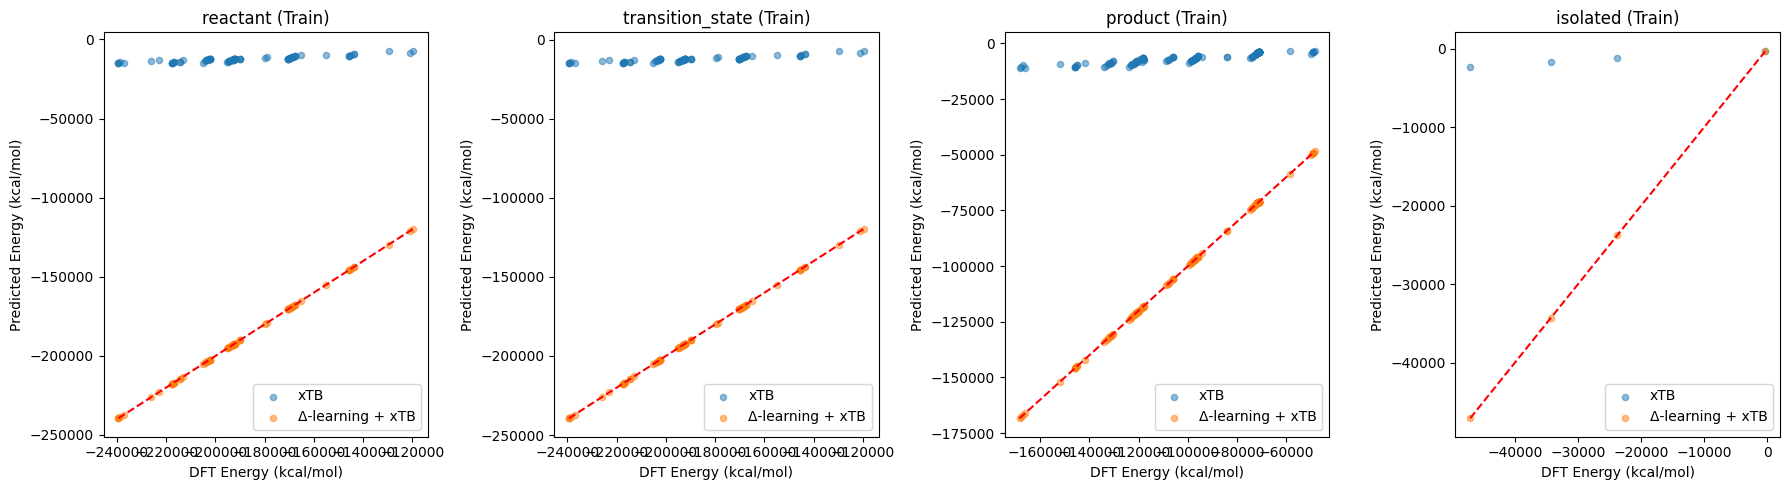

Test | reactant MAE xTB = 177972.324 kcal/mol
Test | reactant MAE Δ-learning+xTB = 1.830 kcal/mol
Test | transition_state MAE xTB = 177980.298 kcal/mol
Test | transition_state MAE Δ-learning+xTB = 3.121 kcal/mol
Test | product MAE xTB = 89002.717 kcal/mol
Test | product MAE Δ-learning+xTB = 0.969 kcal/mol


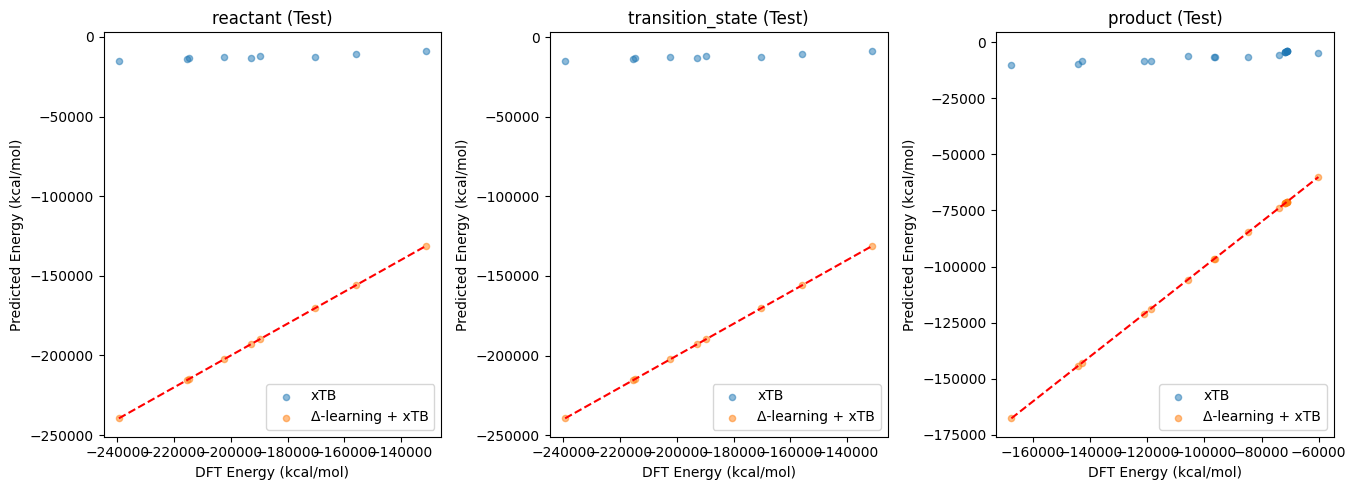

In [24]:
import matplotlib.pyplot as plt
import numpy as np
from ase.io import read

EV2KCAL = 23.0609

def plot_energy_MAE_by_type(db, label=''):
    # Tipos de estructuras
    types = ['reactant', 'transition_state', 'product', 'isolated']

    plt.figure(figsize=(18,5))

    for i, t in enumerate(types):
        # Filtrar por tipo, usando .get para no lanzar KeyError
        atoms_t = [at for at in db if at.info.get('structure_type', 'isolated') == t]

        if len(atoms_t) == 0:
            continue

        # Extraer energías y convertir
        E_DFT = np.array([at.info['energy_dft'] for at in atoms_t]) * EV2KCAL
        E_xTB = np.array([at.info['energy_xtb'] for at in atoms_t]) * EV2KCAL

        # Δ-learning prediction: MACE_delta + xTB
        E_delta = np.array([at.info['MACE_energy'] + at.info['energy_xtb'] for at in atoms_t]) * EV2KCAL

        # Calcular MAEs
        mae_xTB = np.mean(np.abs(E_DFT - E_xTB))
        mae_delta = np.mean(np.abs(E_DFT - E_delta))

        print(f"{label} | {t} MAE xTB = {mae_xTB:.3f} kcal/mol")
        print(f"{label} | {t} MAE Δ-learning+xTB = {mae_delta:.3f} kcal/mol")

        # Scatter plots
        plt.subplot(1, len(types), i+1)
        plt.scatter(E_DFT, E_xTB, s=20, alpha=0.5, label='xTB')
        plt.scatter(E_DFT, E_delta, s=20, alpha=0.5, label='Δ-learning + xTB')
        plt.plot([E_DFT.min(), E_DFT.max()], [E_DFT.min(), E_DFT.max()], 'r--')
        plt.xlabel('DFT Energy (kcal/mol)')
        plt.ylabel('Predicted Energy (kcal/mol)')
        plt.title(f'{t} ({label})')
        plt.legend()

    plt.tight_layout()
    plt.show()

# -----------------------------
# Leer datasets
# -----------------------------
train_data = read('tests/RXN_DELTA_TEST/train_delta.xyz', ':')
test_data  = read('tests/RXN_DELTA_TEST/test_delta.xyz', ':')

# -----------------------------
# Graficar comparaciones
# -----------------------------
plot_energy_MAE_by_type(train_data, label='Train')
plot_energy_MAE_by_type(test_data, label='Test')



MAEs Train dataset (kcal/mol):

2+2_cycloaddition: Barrier MAE xTB = 8.502, Δ-learning MAE = 1.737
2+2_cycloaddition: ΔH MAE xTB = 24.902, Δ-learning MAE = 0.996
1,2_Insertion_CO: Barrier MAE xTB = 9.731, Δ-learning MAE = 2.465
1,2_Insertion_CO: ΔH MAE xTB = 42.891, Δ-learning MAE = 1.550


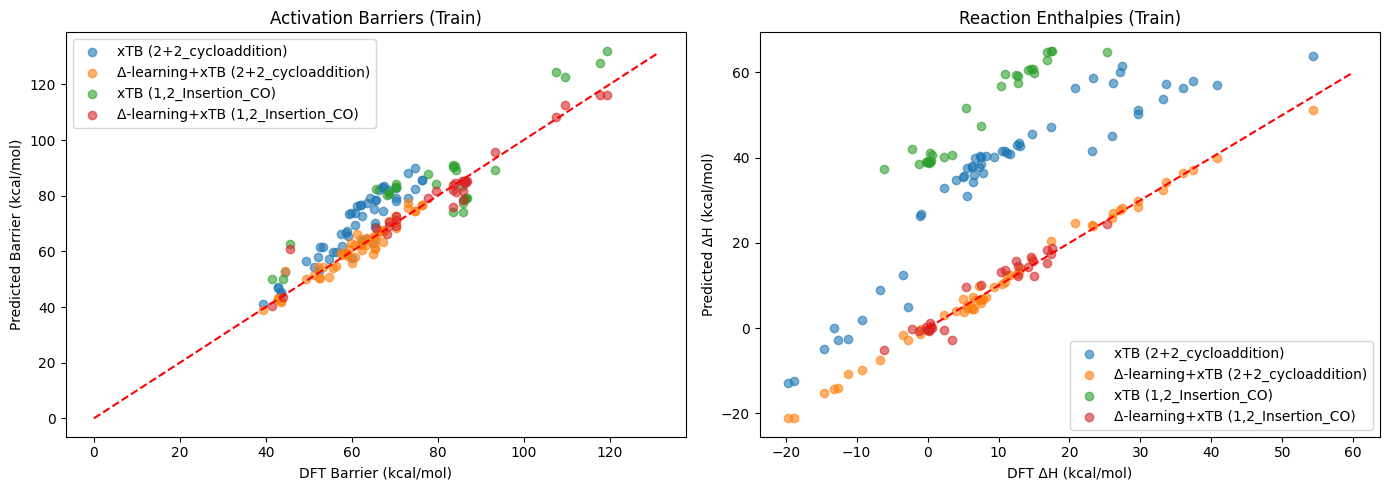


MAEs Test dataset (kcal/mol):

2+2_cycloaddition: Barrier MAE xTB = 8.541, Δ-learning MAE = 5.539
2+2_cycloaddition: ΔH MAE xTB = 23.258, Δ-learning MAE = 0.907
1,2_Insertion_CO: Barrier MAE xTB = 7.788, Δ-learning MAE = 2.179
1,2_Insertion_CO: ΔH MAE xTB = 45.423, Δ-learning MAE = 1.615


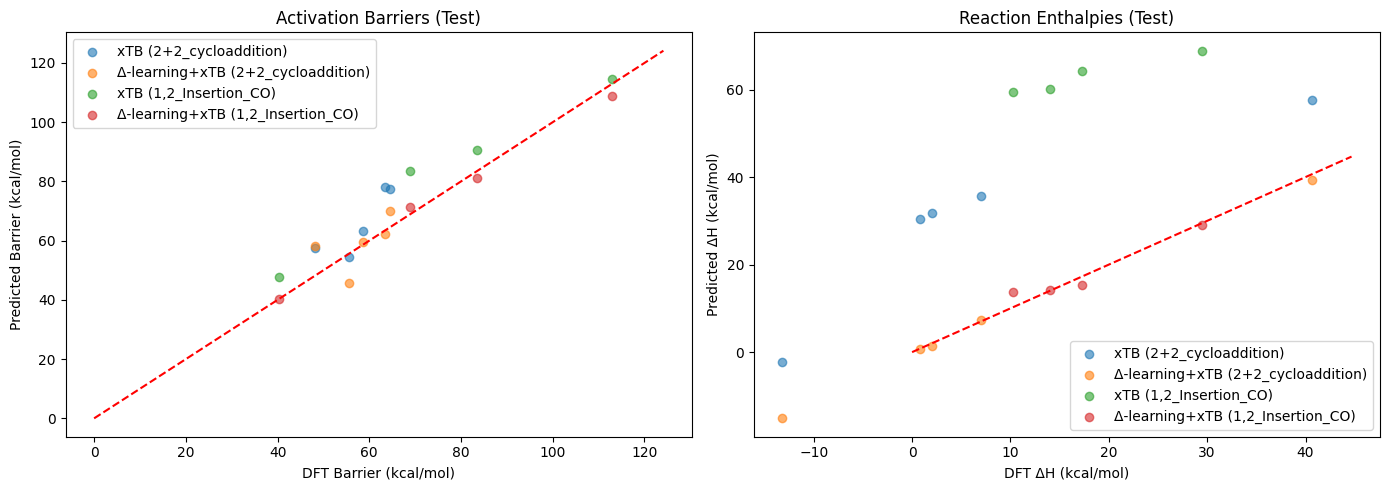

In [26]:
import matplotlib.pyplot as plt
import numpy as np
from ase.io import read
from collections import defaultdict

EV2KCAL = 23.0609  # conversión eV → kcal/mol

# -----------------------------
# Función para calcular barreras y entalpías
# -----------------------------
def compute_barriers_entalpies_delta(db):
    rxn_dict = defaultdict(list)
    for at in db:
        rxn_dict[at.info['reaction_id']].append(at)

    results = []
    for rxn_id, atoms in rxn_dict.items():
        # Separar por tipo
        R_atoms = [at for at in atoms if at.info.get('structure_type') == 'reactant']
        TS_atoms = [at for at in atoms if at.info.get('structure_type') == 'transition_state']
        P_atoms = [at for at in atoms if at.info.get('structure_type') == 'product']

        if len(R_atoms) == 0 or len(TS_atoms) == 0 or len(P_atoms) == 0:
            continue

        # Energía reactivo promedio
        E_R_DFT = np.mean([at.info['energy_dft'] for at in R_atoms])
        E_R_xTB = np.mean([at.info['energy_xtb'] for at in R_atoms])
        E_R_delta = np.mean([at.info['MACE_energy'] + at.info['energy_xtb'] for at in R_atoms])

        # Energía TS promedio
        E_TS_DFT = np.mean([at.info['energy_dft'] for at in TS_atoms])
        E_TS_xTB = np.mean([at.info['energy_xtb'] for at in TS_atoms])
        E_TS_delta = np.mean([at.info['MACE_energy'] + at.info['energy_xtb'] for at in TS_atoms])

        # Energía de productos: sumamos todas las energías
        E_P_DFT = sum([at.info['energy_dft'] for at in P_atoms])
        E_P_xTB = sum([at.info['energy_xtb'] for at in P_atoms])
        E_P_delta = sum([at.info['MACE_energy'] + at.info['energy_xtb'] for at in P_atoms])

        # Barrera y entalpía
        barrier_DFT = (E_TS_DFT - E_R_DFT) * EV2KCAL
        barrier_xTB = (E_TS_xTB - E_R_xTB) * EV2KCAL
        barrier_delta = (E_TS_delta - E_R_delta) * EV2KCAL

        deltaH_DFT = (E_P_DFT - E_R_DFT) * EV2KCAL
        deltaH_xTB = (E_P_xTB - E_R_xTB) * EV2KCAL
        deltaH_delta = (E_P_delta - E_R_delta) * EV2KCAL

        rxn_type = R_atoms[0].info.get('reaction_type', 'unknown')

        results.append({
            'reaction_id': rxn_id,
            'reaction_type': rxn_type,
            'barrier_DFT': barrier_DFT,
            'barrier_xTB': barrier_xTB,
            'barrier_delta': barrier_delta,
            'deltaH_DFT': deltaH_DFT,
            'deltaH_xTB': deltaH_xTB,
            'deltaH_delta': deltaH_delta
        })
    return results

# -----------------------------
# Función para imprimir MAEs
# -----------------------------
def print_MAEs_barriers(results, label=''):
    types = set([r['reaction_type'] for r in results])
    print(f"\nMAEs {label} dataset (kcal/mol):\n")
    for t in types:
        r_type = [r for r in results if r['reaction_type'] == t]

        barrier_MAE_xTB = np.mean([abs(r['barrier_DFT'] - r['barrier_xTB']) for r in r_type])
        barrier_MAE_delta = np.mean([abs(r['barrier_DFT'] - r['barrier_delta']) for r in r_type])

        deltaH_MAE_xTB = np.mean([abs(r['deltaH_DFT'] - r['deltaH_xTB']) for r in r_type])
        deltaH_MAE_delta = np.mean([abs(r['deltaH_DFT'] - r['deltaH_delta']) for r in r_type])

        print(f"{t}: Barrier MAE xTB = {barrier_MAE_xTB:.3f}, Δ-learning MAE = {barrier_MAE_delta:.3f}")
        print(f"{t}: ΔH MAE xTB = {deltaH_MAE_xTB:.3f}, Δ-learning MAE = {deltaH_MAE_delta:.3f}")

# -----------------------------
# Función para graficar scatter
# -----------------------------
def plot_barriers_entalpies_delta(results, label=''):
    types = set([r['reaction_type'] for r in results])
    plt.figure(figsize=(14,5))

    # Barreras
    plt.subplot(1,2,1)
    for t in types:
        r_type = [r for r in results if r['reaction_type']==t]
        plt.scatter([r['barrier_DFT'] for r in r_type],
                    [r['barrier_xTB'] for r in r_type],
                    label=f'xTB ({t})', alpha=0.6)
        plt.scatter([r['barrier_DFT'] for r in r_type],
                    [r['barrier_delta'] for r in r_type],
                    label=f'Δ-learning+xTB ({t})', alpha=0.6)
    max_val = max([r['barrier_DFT'] for r in results])*1.1
    plt.plot([0, max_val], [0, max_val], 'r--')
    plt.xlabel('DFT Barrier (kcal/mol)')
    plt.ylabel('Predicted Barrier (kcal/mol)')
    plt.title(f'Activation Barriers ({label})')
    plt.legend()

    # Entalpías
    plt.subplot(1,2,2)
    for t in types:
        r_type = [r for r in results if r['reaction_type']==t]
        plt.scatter([r['deltaH_DFT'] for r in r_type],
                    [r['deltaH_xTB'] for r in r_type],
                    label=f'xTB ({t})', alpha=0.6)
        plt.scatter([r['deltaH_DFT'] for r in r_type],
                    [r['deltaH_delta'] for r in r_type],
                    label=f'Δ-learning+xTB ({t})', alpha=0.6)
    max_val = max([r['deltaH_DFT'] for r in results])*1.1
    plt.plot([0, max_val], [0, max_val], 'r--')
    plt.xlabel('DFT ΔH (kcal/mol)')
    plt.ylabel('Predicted ΔH (kcal/mol)')
    plt.title(f'Reaction Enthalpies ({label})')
    plt.legend()

    plt.tight_layout()
    plt.show()

# -----------------------------
# Leer datasets de evaluación
# -----------------------------
train_data = read('tests/RXN_DELTA_TEST/train_delta.xyz', ':')
test_data  = read('tests/RXN_DELTA_TEST/test_delta.xyz', ':')

# Ignorar los 4 primeros átomos aislados en el train
train_data_reac = train_data[4:]

# -----------------------------
# Evaluación Train
# -----------------------------
train_results = compute_barriers_entalpies_delta(train_data_reac)
print_MAEs_barriers(train_results, label='Train')
plot_barriers_entalpies_delta(train_results, label='Train')

# -----------------------------
# Evaluación Test
# -----------------------------
test_results = compute_barriers_entalpies_delta(test_data)
print_MAEs_barriers(test_results, label='Test')
plot_barriers_entalpies_delta(test_results, label='Test')

